<link rel="stylesheet" type="text/css" href="custom.css">

# Spectral Analysis

:::{note} 

These (and most other) notes derive **heavily** from DelSole and Tippett's fantastic textbook, [*Statistical Methods for Climate Scientists*](https://doi.org/10.1017/9781108659055).

:::

## (notebook preliminaries)

### Python imports and config

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import xarray as xr

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
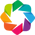

In [3]:
import holoviews as hv

hv.extension("bokeh")
import panel as pn

pn.extension()

In [4]:
import puffins as pf
from puffins import plotting as pplt

In [5]:
# Make fonts bigger for slides
plt.rcParams["font.size"] = 16

### Load Central Park data

In [6]:
# Load the data
filepath_in = "../data/central-park-station-data_1869-01-01_2023-09-30.nc"
ds_cp_day = xr.open_dataset(filepath_in)

# Clean: drop all 0 values of the temperature fields which are (mostly) spurious
for varname in ["temp_avg", "temp_min", "temp_max"]:
    ds_cp_day[varname] = ds_cp_day[varname].where(ds_cp_day[varname] != 0.0)

In [7]:
ds_cp_mon = ds_cp_day.resample(dict(time="1M")).mean()

In [8]:
ds_cp_ann = ds_cp_day.groupby("time.year").mean()

In [9]:
tanom_dt_day = pf.stats.detrend(ds_cp_day["temp_anom"])
tanom_dt_mon = pf.stats.detrend(ds_cp_mon["temp_anom"])
tanom_dt_ann = pf.stats.detrend(ds_cp_ann["temp_anom"])

In [10]:
def autocov(arr, lags=None):
    """Sample autocovariance of a 1D array.

    Assumes that the deterministic component, $\hat\mu$, is constant in time.
    """
    if isinstance(arr, xr.DataArray):
        vals = arr.values
    else:
        vals = arr

    num_vals = len(vals)

    if lags is None:
        lags = range(num_vals)
    if np.isscalar(lags):
        lags = [lags]
    lags = np.abs(lags)

    mean = np.mean(vals)
    covs = np.zeros_like(lags) * np.nan
    for n, lag in enumerate(lags):
        x_t = vals[lag:]
        x_t_lag = vals[: num_vals - lag]
        covs[n] = np.sum((x_t - mean) * (x_t_lag - mean))
    return covs / num_vals

## Introduction to spectral analysis

### The basics

In **spectral analysis**, we change perspectives regarding our timeseries.

Normally, we think of a timeseries as the combination of signals (values) occuring at different *points in time*.

In spectral analysis, we think of a timeseries as the combination of signals (amplitudes) occuring at different *frequencies in time*.

Each of these signals has a particular **frequency** (or, equivalently, **period**) and **amplitude**.

Spectral techniques can be applied to other dimensions too, such as location.

In that case, *period* (how long in *time* each cycle lasts) gets replaced with *wavelength* (how far in *space* each cycle spans).

That said, we'll stick to time moving forward.

### An example spectral decomposition: a square wave

A [square wave](https://en.wikipedia.org/wiki/Square_wave) is, well, a wave that's square.

Graphically: 

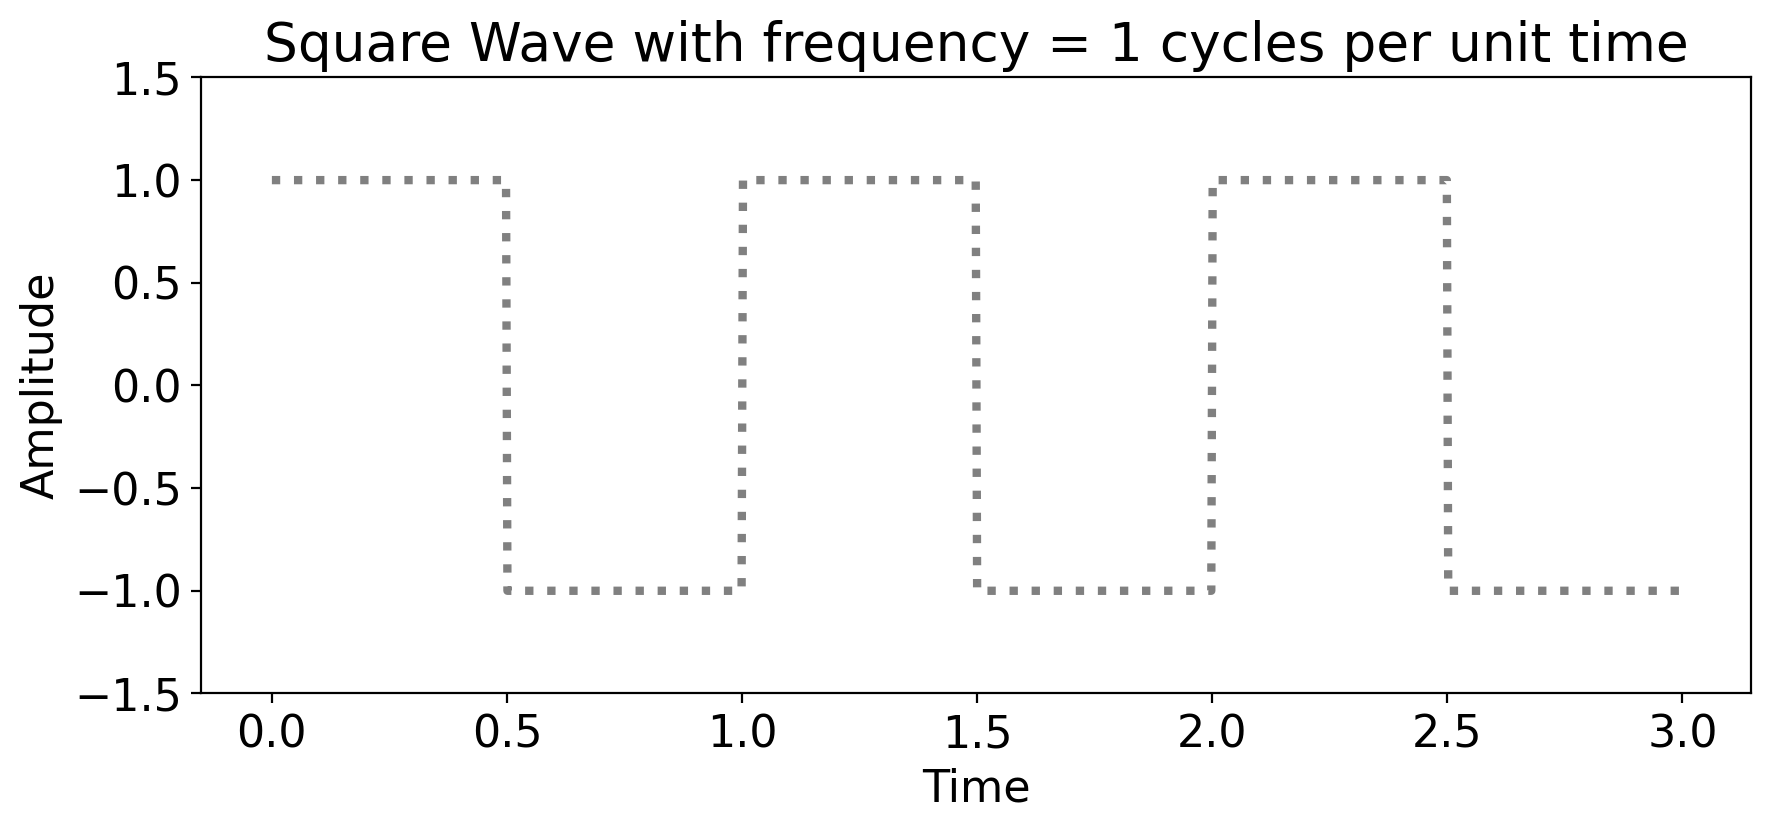

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters for the square wave
period = 1  # period of the square wave
amplitude = 1  # Amplitude of the square wave
periods = 3  # Number of full periods to display

# Time array
t = np.linspace(0, periods * period, 1000, endpoint=False)

# Generate the square wave
square_wave = amplitude * signal.square(2 * np.pi * (1 / period) * t)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(t, square_wave, linestyle=":", color="grey", linewidth=3)
plt.title(f"Square Wave with frequency = {period} cycles per unit time")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.ylim(-1.5 * amplitude, 1.5 * amplitude)

plt.show()

Mathematically:

$$f(x) = \begin{cases} 
  A & \text{if } (2n-1)T \leq t < 2nT, \\
  -A & \text{if } 2nT \leq t < (2n+1)T,
\end{cases}$$

where $t$ is time, $A$ is the amplitude, and $T$ is the **period**.

The **period** is always the inverse of the **frequency**.

The period says "how long does it take to complete one cycle?"  Longer period = *slower* cycle.

The frequency says "how many cycles are there per unit time?"  Larger frequency = *faster* cycle.

Via spectral techniques (specifically **Fourier analysis**), we can approximate this as the sum of sine waves, each with different frequencies.

As the number of sines increases, the approximation gets better and better.

Here's an awesome visualization of this from Wikipedia:

![Visualizaiton of Fourier series of square wave from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/b/bd/Fourier_series_square_wave_circles_animation.svg)

In fact, if the number of sine waves if *infinite*, then you get the square wave *exactly*.

This doesn't just hold for the square wave: it holds for *any* function!

Like this [sawtooth wave](https://en.wikipedia.org/wiki/Sawtooth_wave) (animation via [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/1/1e/Fourier_series_sawtooth_wave_circles_animation.svg)): 

![Wiki animation of sawtooth](https://upload.wikimedia.org/wikipedia/commons/1/1e/Fourier_series_sawtooth_wave_circles_animation.svg)

And this weird piecewise-defined function (via [Wikipedia](https://en.wikipedia.org/wiki/Fourier_series#/media/File:Example_of_Fourier_Convergence.gif)):

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Example_of_Fourier_Convergence.gif" alt="Fourier Series Convergence" width="400"/>

And, last but definitely not least, check out this drawing of Fourier himself generated via (complex) Fourier transforms, in a truly fantastic video by 3Brown1Blue: https://youtu.be/r6sGWTCMz2k?si=65rDzrkoa6_Z_seD

These examples have all been **continuous**, which is why you need the sum of an *infinite* number of sines to generate the original function exactly.

But all of the timeseries we analyze are **discrete**: there are finitely many values, each separated from one another by some finite amount of time.

For example, a year's worth of cooling degree days from the Central Park dataset:

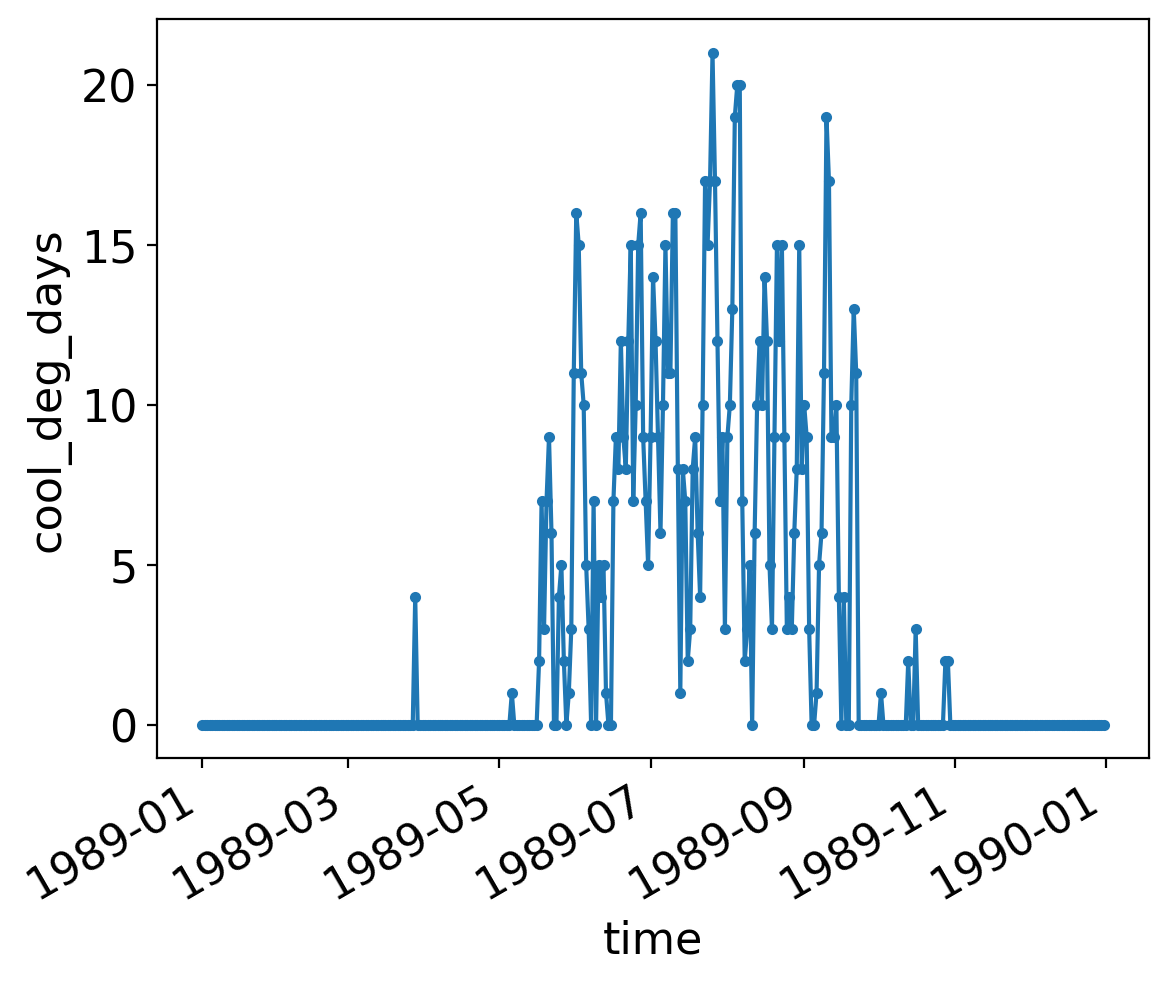

In [12]:
ds_cp_day["cool_deg_days"].sel(time=slice("1989", "1989")).plot(marker=".")

Even though we connect the individual points with a line, they are discrete: one value per day.

In that case, you don't need *infinitely* many sines or cosines; you just need as many as there are points in time.

The formal procedure for doing so is **Discrete Fourier Transform**, which we'll now dive into.

## Discrete Fourier Transform

Any discrete time series can be represented as the sum of sines and cosines of various frequencies and amplitudes.

This is called **discrete Fourier transform**, named after [Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier).

The mathematical derivation of Fourier transforms (whether discrete or continuous) is relatively straightforward, but it's long and tedious enough that we'll gloss over it.

Instead we'll just go straight to the point: what it is, and then how to compute it in python.

### Discrete Fourier transforms, formally

Formally:

$$X_t=\sum_{j=0}^{N/2}\left(A_j\cos(\omega_j t)+B_j\sin(\omega_j t)\right),$$

where $X_t$ is the time series, and $N$ is the number of timesteps.

The values $\omega_j$ are the **Fourier frequencies**, defined as:

$$\omega_j=\frac{2\pi j}{N}.$$

The values $A_j$ and $B_j$ are the **amplitudes** of the cosine and sine waves, respectively, at each Fourier frequency $\omega_j$.

Technical note: the method computers use to do this is called **Fast Fourier Transform** (FFT).

FFT requires that the number of points, $N$, be even.  For odd $N$, it just drops one value.

But what are the values of $A_j$ and $B_j$?  

Again, we're skipping the derivation entirely, but it turns out that for the "interior" (meaning not the single largest or smallest frequency) these are:

$$A_j=\frac{2}{N}\sum_{t=1}^{N}X_t\cos(\omega_jt),\qquad\text{for }j\neq0,N/2$$

and

$$B_j=\frac{2}{N}\sum_{t=1}^{N}X_t\sin(\omega_jt),\qquad\text{for }j\neq0,N/2$$

The endpoints are special:

$$A_0=\frac{1}{N}\sum_{t=1}^{N}X_t.$$

Do you recognize the RHS (right-hand-side)?

It's just the time mean, $\overline{X}$!  In other words $A_0=\overline{X}$ always.

Finally, it turns out that $B_0$ and $B_{N/2}$ drop out, leaving just $A_{N/2}$ remaining:

$$A_{N/2}=\frac{1}{N}\sum_{t=1}^{N}(-1)^tX_t,$$

which *looks* like the time mean but flips the sign of consecutive values via the $(-1)^t$ term.

### Discrete Fourier transforms, in practice

For the purposes of this class, you can compute all these $A_j$ and $B_j$ components in python using scipy's implementation of FFT:

- [scipy.fft.fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft) to perform the FFT
- [scipy.fft.fftfreq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html) to compute the sample frequencies

:::{note} 

The Fast Fourier Transform algorithm implemented in `scipy.fft.fft` uses different conventions in terms of the indexing and leading normalization factors compared to the equations above.  It also uses complex numbers.  All of this results in a more efficient algorithm.

But as such, there won't be a one-to-one correspondence between the exact values you would get by calculating the above equations by scratch vs. plugging your timeseries into `scipy.fft.fft`.

:::

### Some examples

Let's apply this to a series of simple examples.

First, we (meaning ChatGPT following my prompt) will generate a function that, given a timeseries, does the following:

- computes the Fourier transform
- plots the original timeseries
- plots the amplitudes of each component

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


def plot_time_series_and_dft(t, timeseries, title="Time Series and DFT"):
    """
    Plots a given time series and its Discrete Fourier Transform (DFT).

    :param t: Array of time points.
    :param timeseries: Array of time series data points.
    :param title: Title of the plot.
    """
    # Compute the Discrete Fourier Transform (DFT) using FFT
    fft_result = fft(timeseries)

    # Get frequencies for the components
    freq = fftfreq(len(t), d=(t[1] - t[0]))

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot the original time series
    axs[0].plot(t, timeseries)
    axs[0].set_title("Original Time Series")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Amplitude")

    # Plot the magnitude of the DFT
    axs[1].plot(
        freq[freq >= 0],
        np.abs(fft_result[freq >= 0]) / len(t),
        marker=".",
    )
    axs[1].set_title("Magnitude of DFT")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Magnitude")
    axs[1].set_xlim(-1, np.max(freq))

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

Now, let's apply it to a *flat line*:

In [14]:
# First generate an array of times that all of the subsequent timeseries will use.
t = np.linspace(0, 10, 400, endpoint=False)

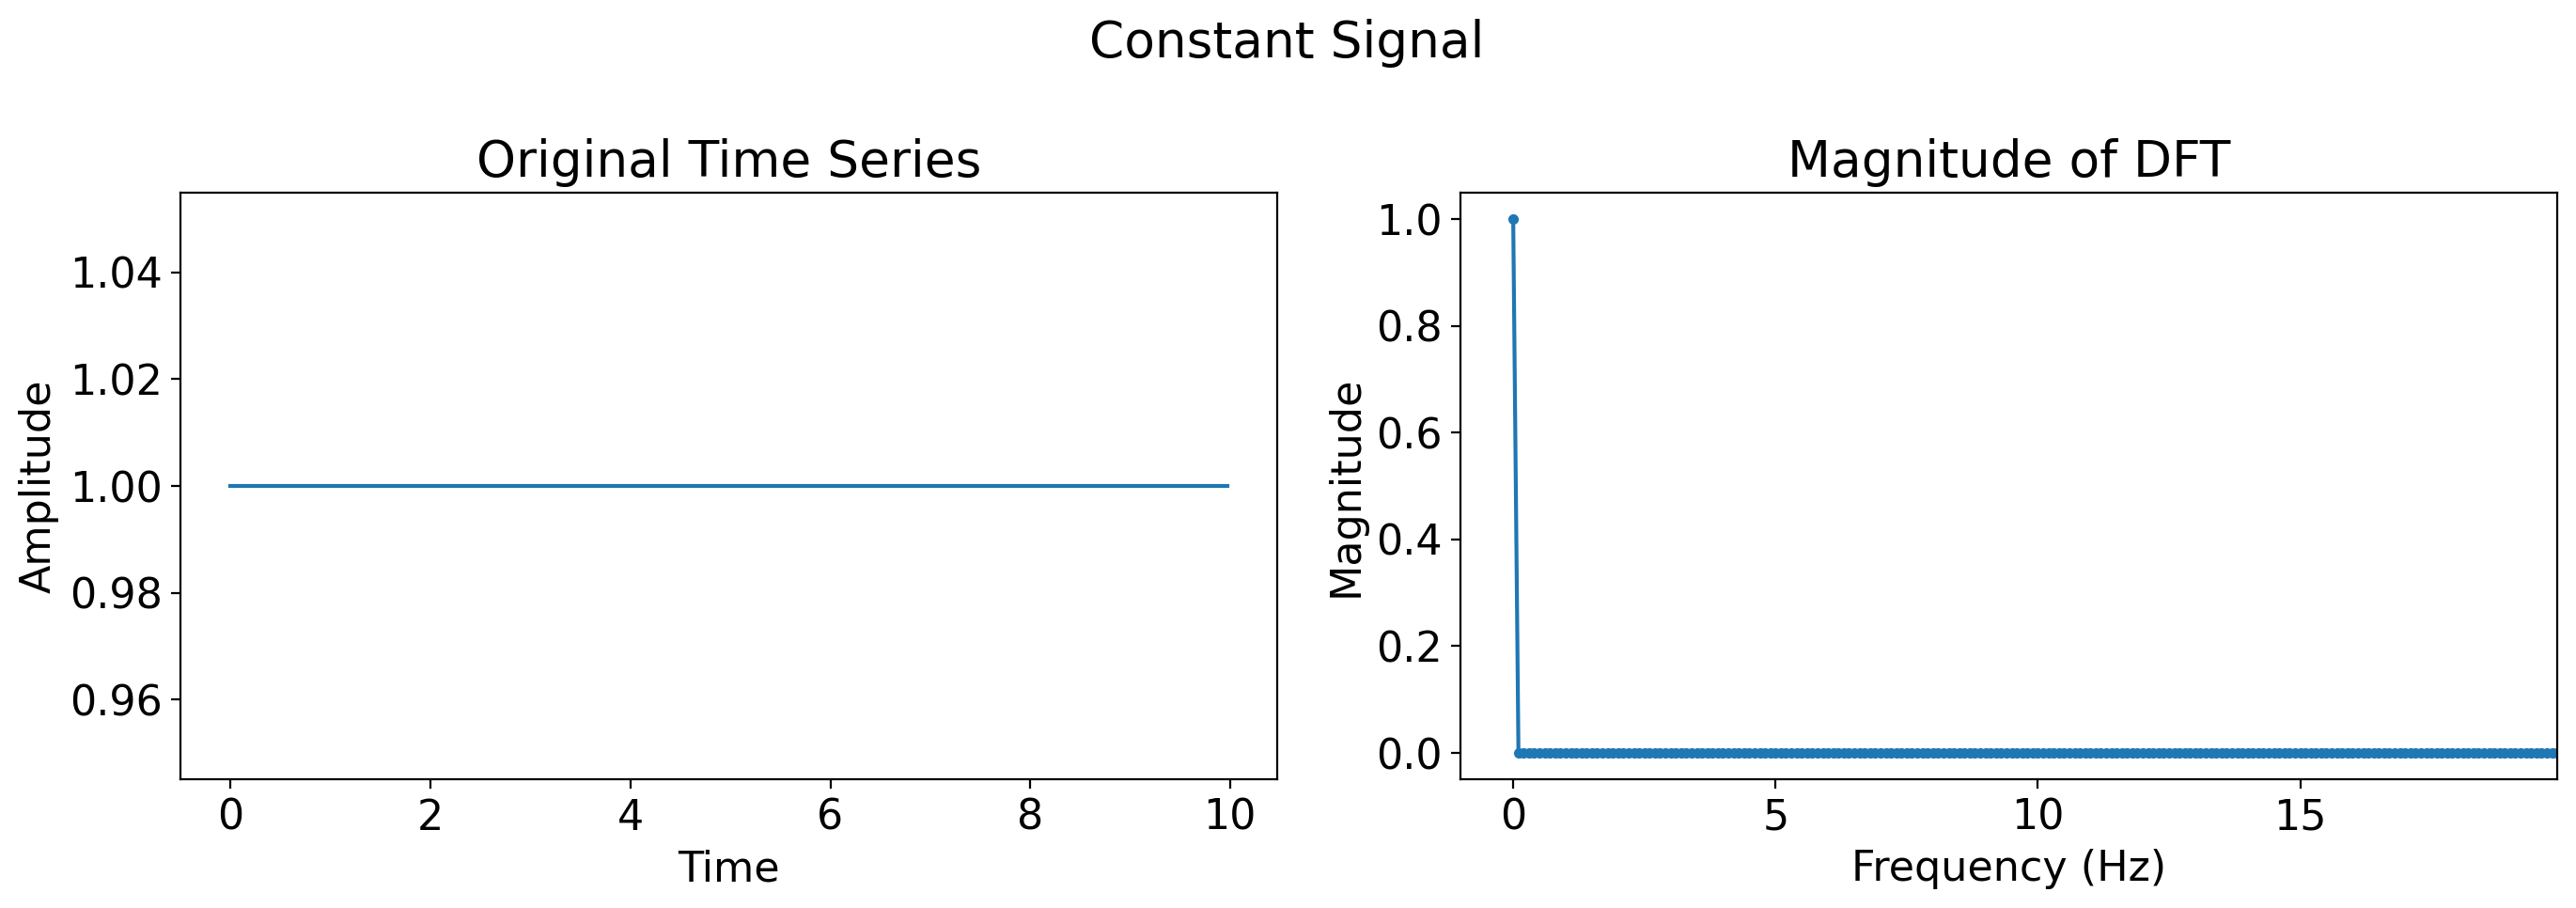

In [15]:
# Constant signal
flat = np.full(len(t), 1)
plot_time_series_and_dft(t, flat, title="Constant Signal")

What do you see?

A flat line means there is no periodic behavior whatsoever.  That means all of the power is in the frequency of 0.

Now, a single sine wave with frequency 1 Hz (where Hz means **Hertz**, which is the standard units for frequency, and means "cycles per second"):

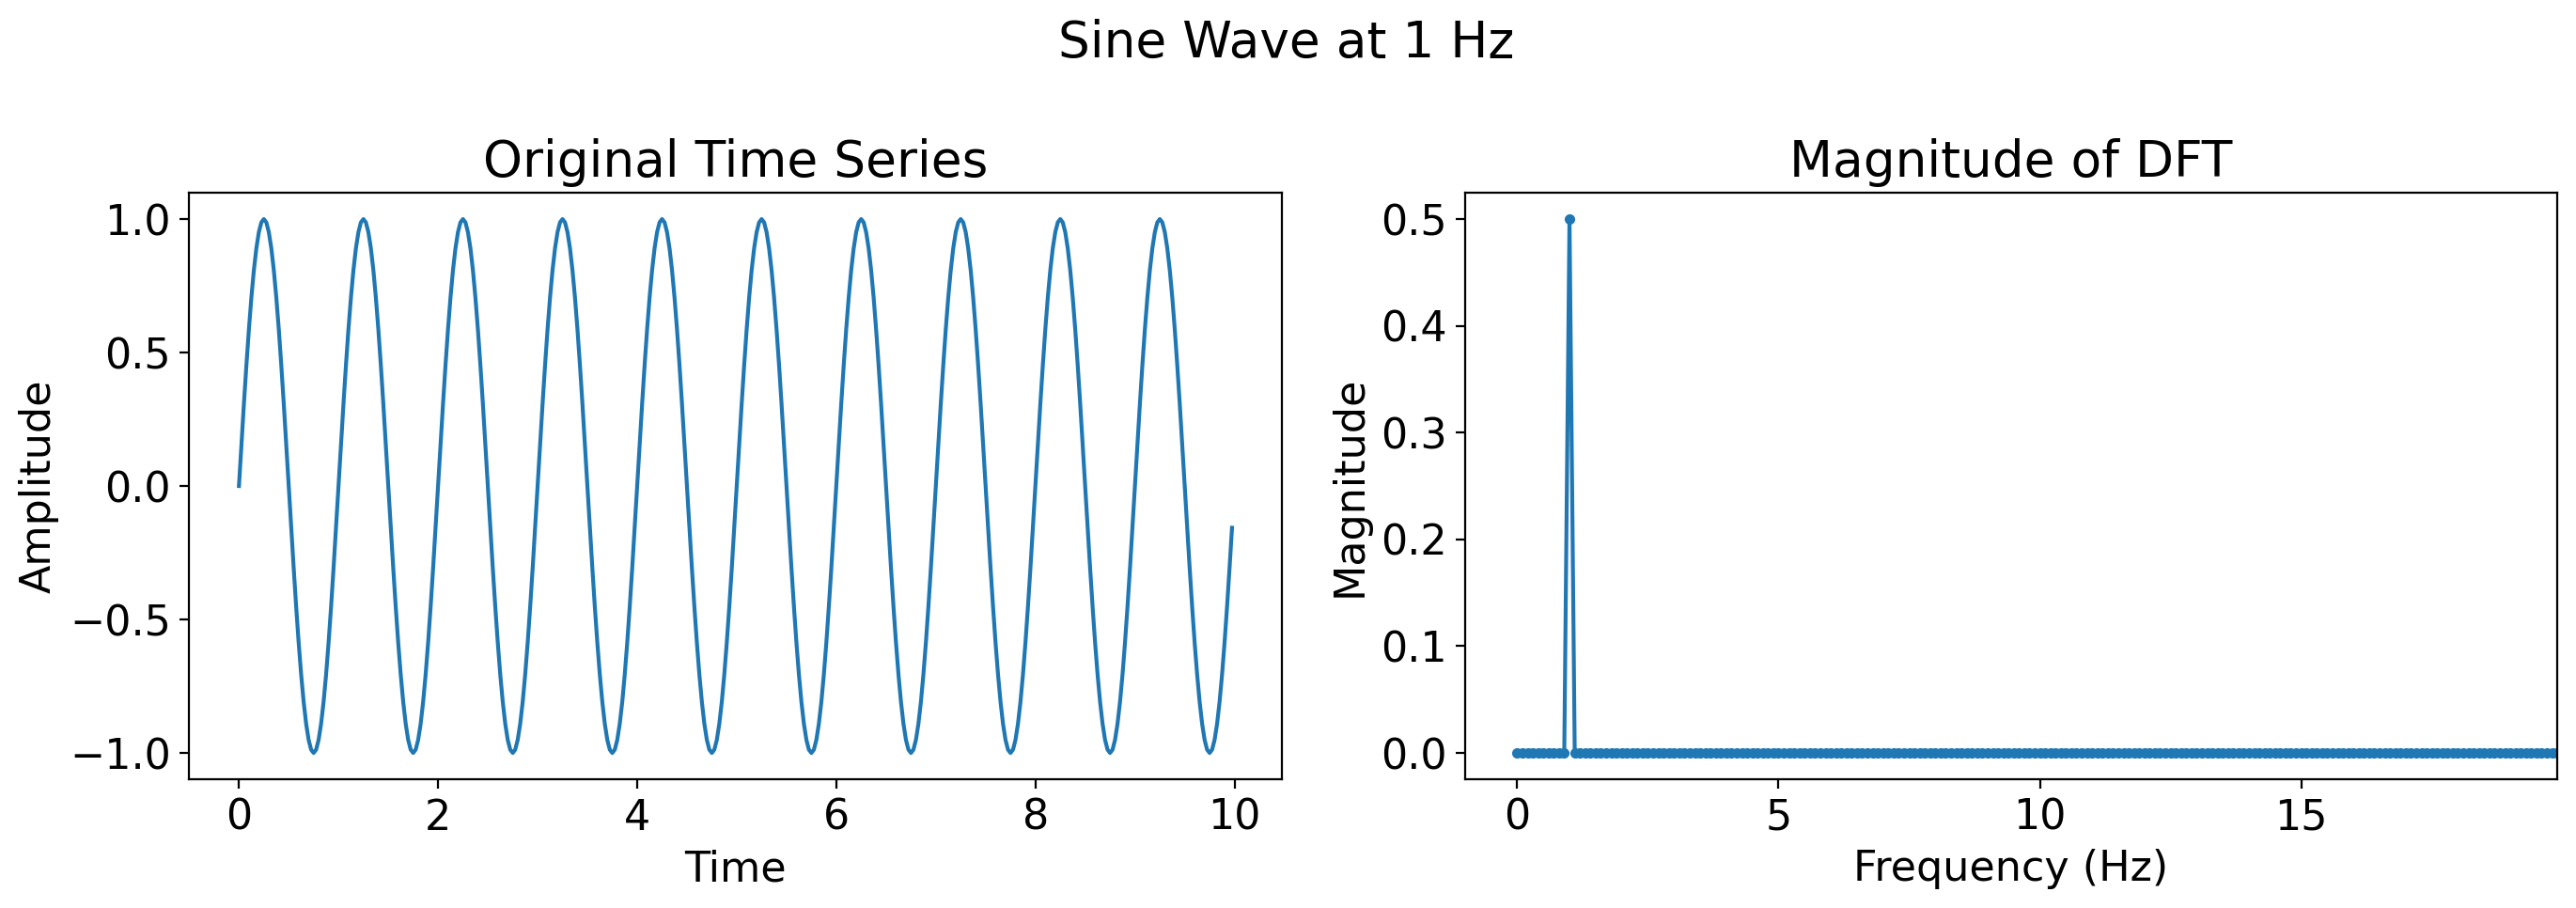

In [16]:
single_sine = np.sin(2 * np.pi * t)
plot_time_series_and_dft(t, single_sine, title="Sine Wave at 1 Hz")

Now, a faster sine wave, one at 10 Hz

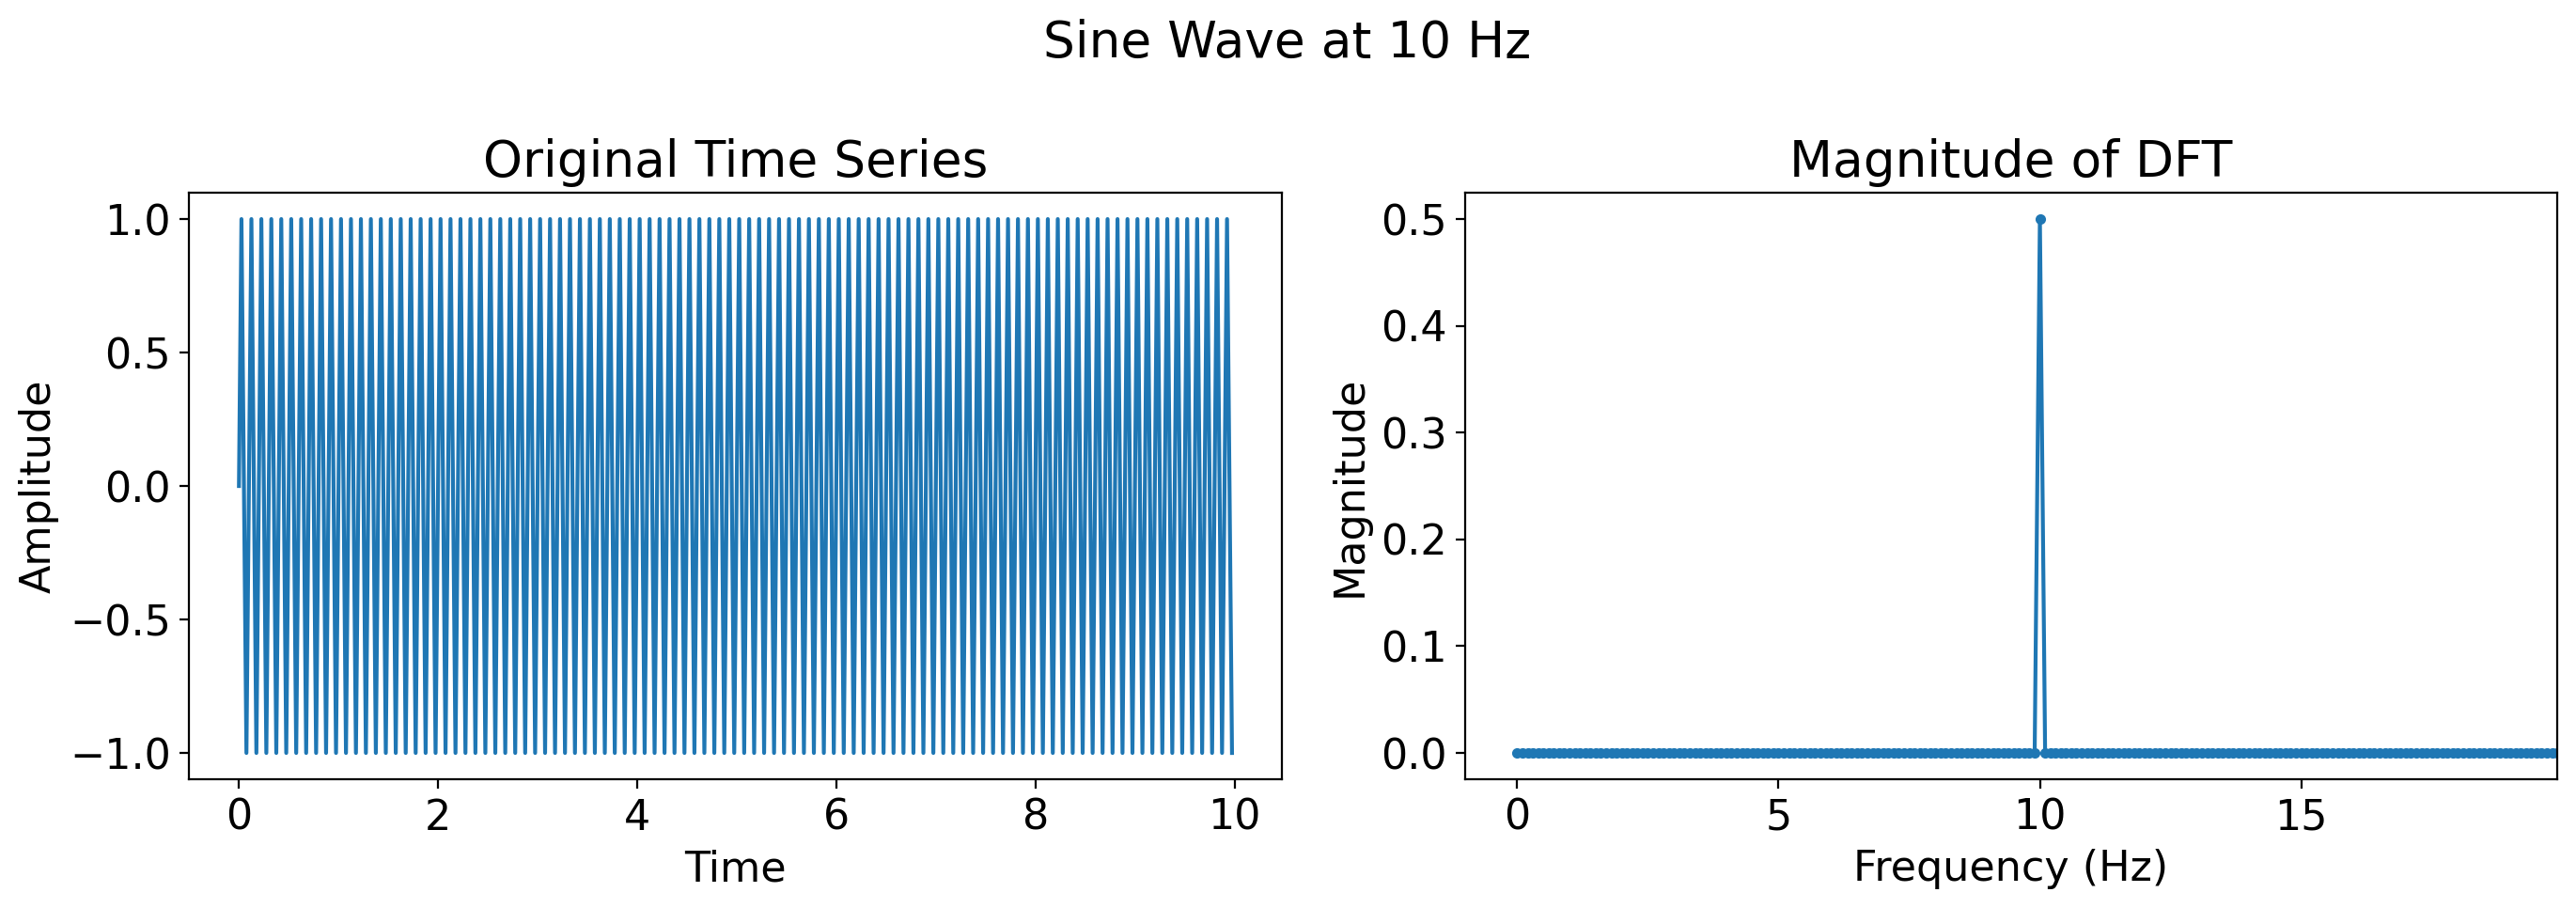

In [17]:
slower_sine = np.sin(2 * 10 * np.pi * t)
plot_time_series_and_dft(t, slower_sine, title="Sine Wave at 10 Hz")

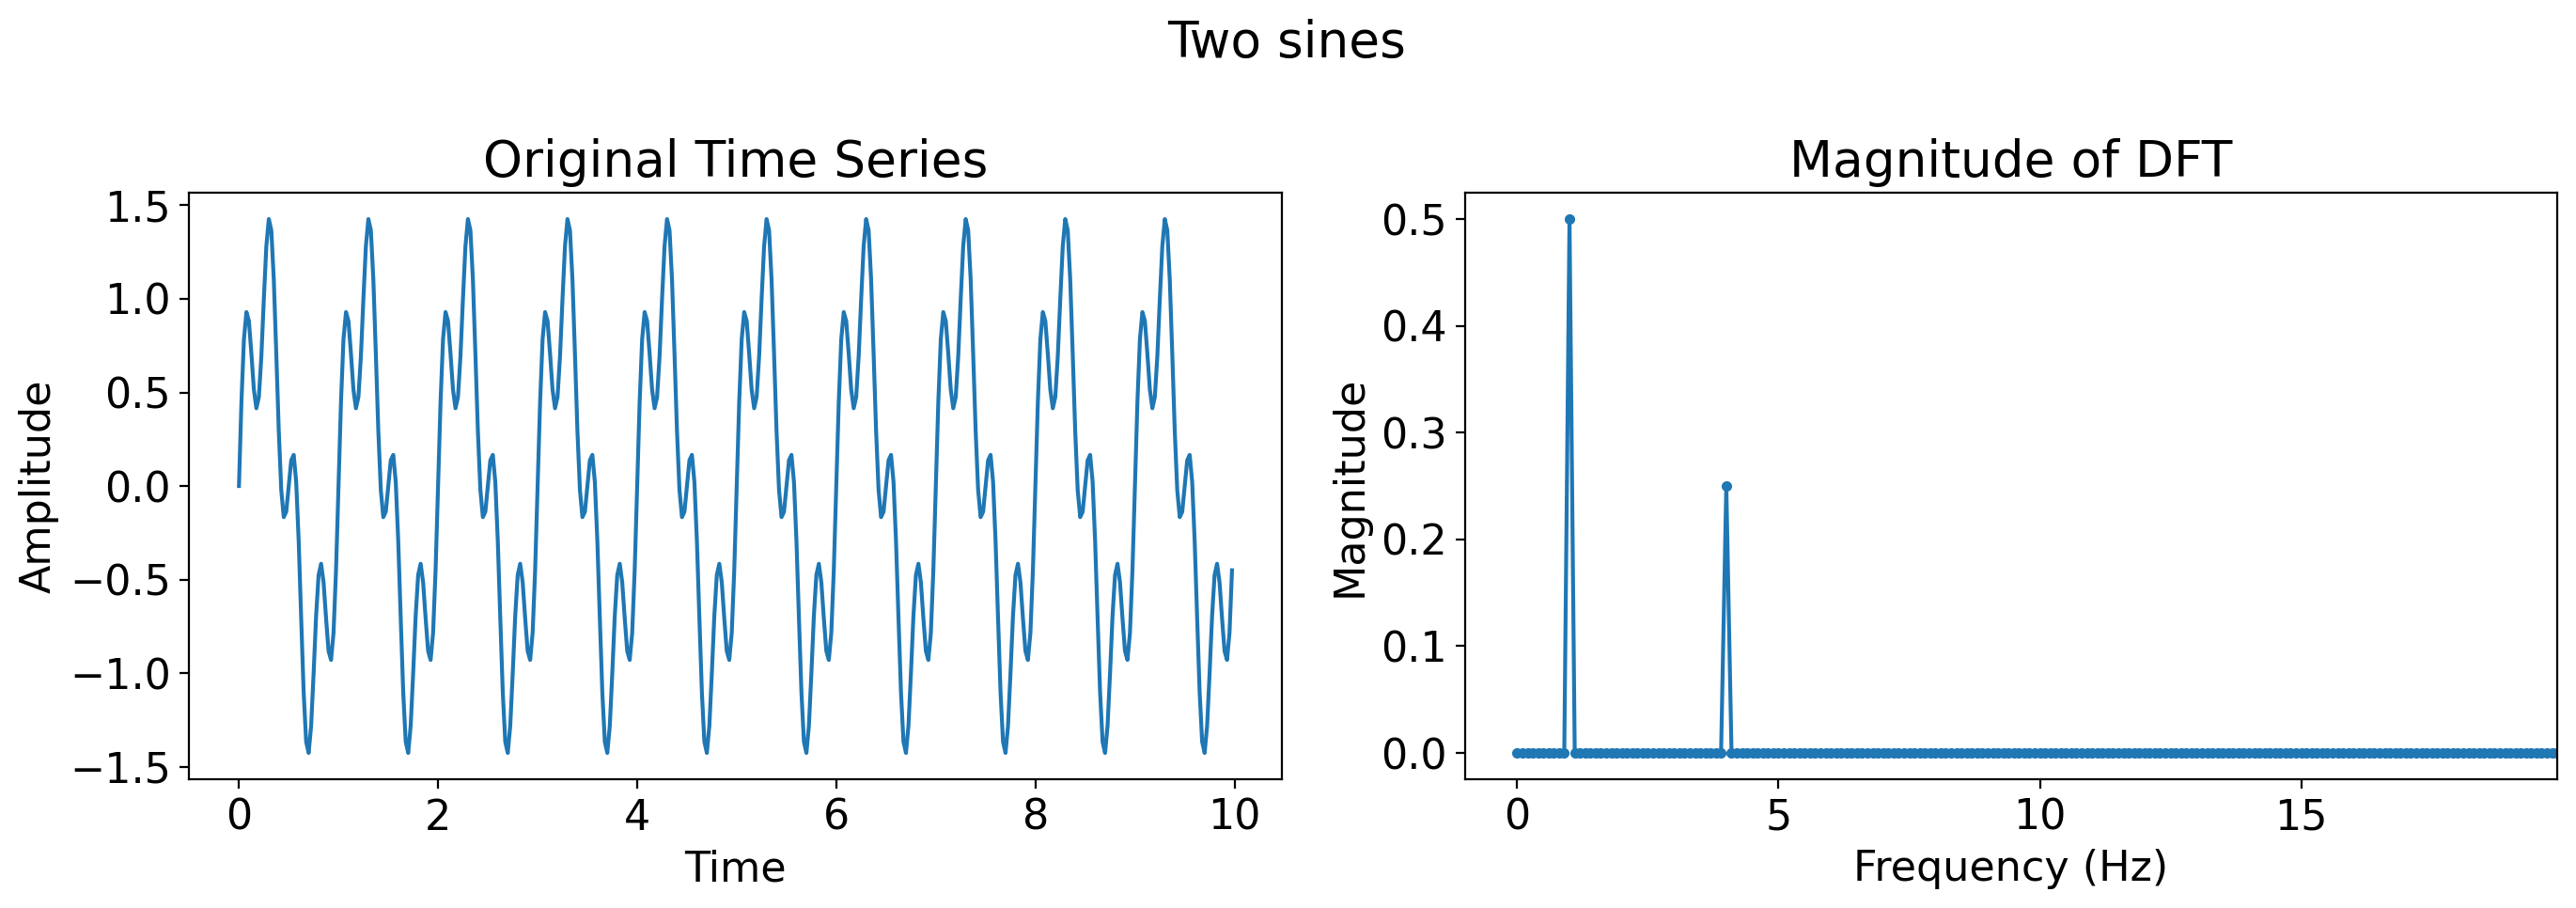

In [18]:
# Superposition of sine waves
two_sines = np.sin(2 * np.pi * t) + 0.5 * np.sin(2 * np.pi * 4 * t)
plot_time_series_and_dft(t, two_sines, title="Two sines")

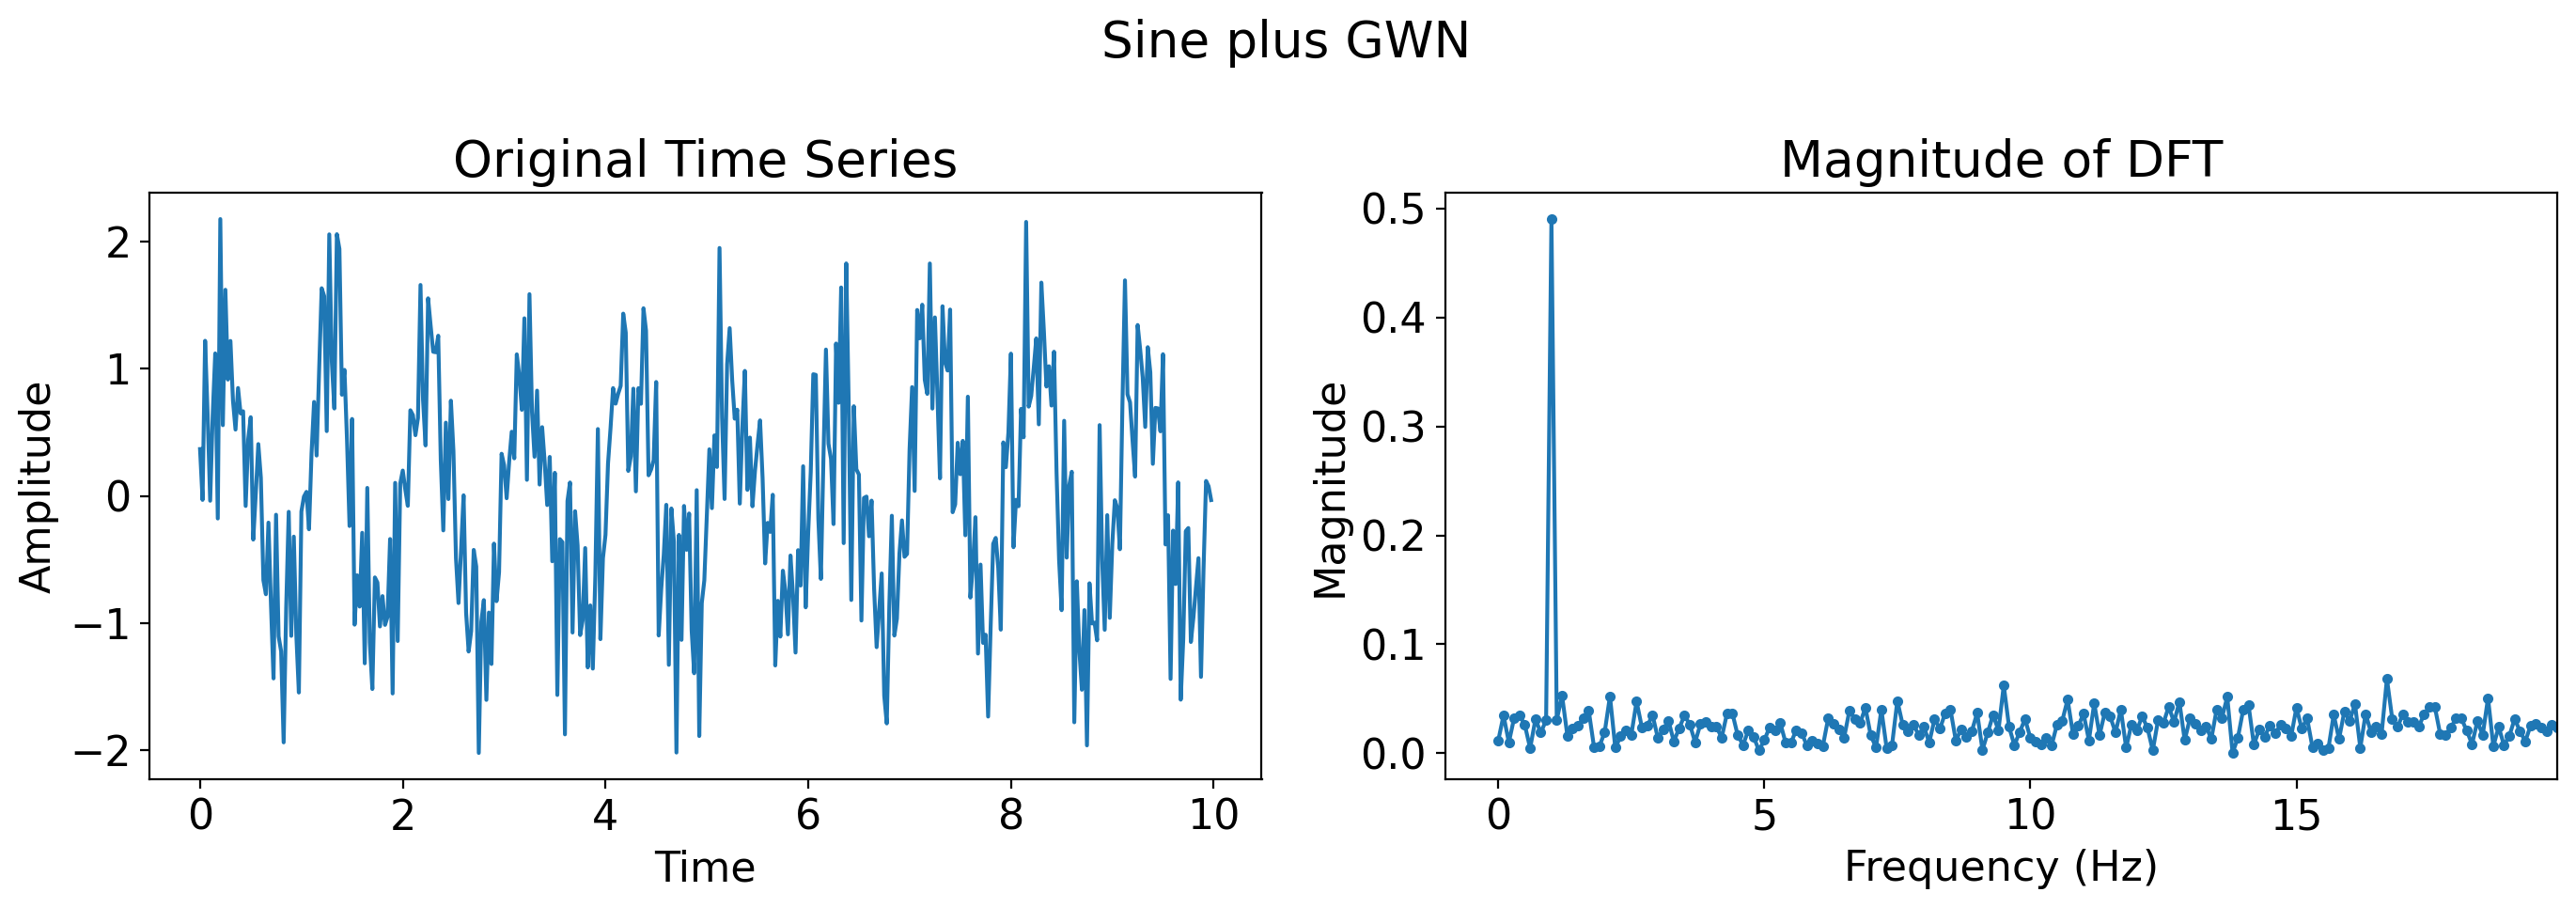

In [19]:
# Sine wave plus Gaussian white noise
sine_with_noise = np.sin(2 * np.pi * t) + np.random.normal(0, 0.5, len(t))
plot_time_series_and_dft(t, sine_with_noise, title="Sine plus GWN")

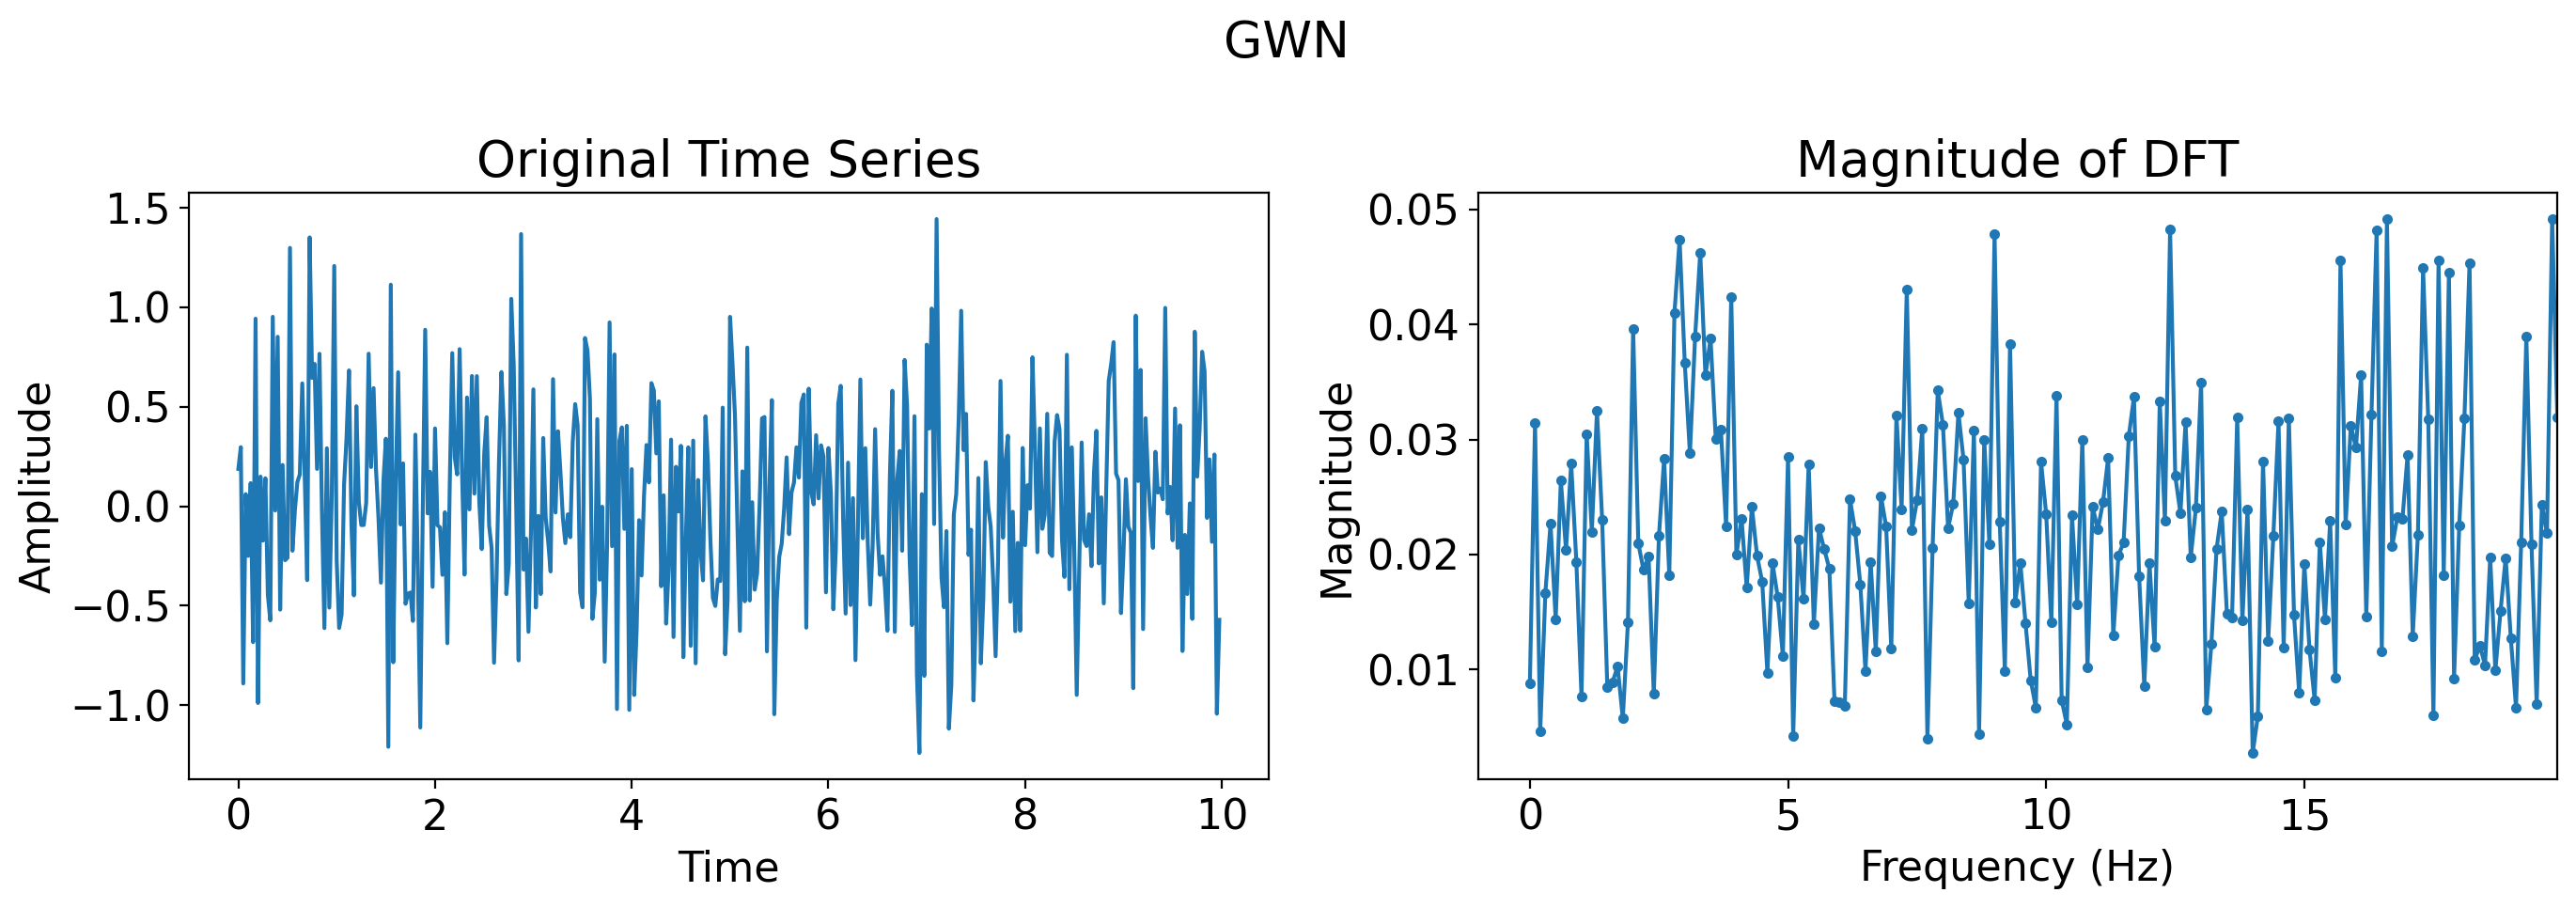

In [20]:
# Just Gaussian white noise
gaussian_white_noise = np.random.normal(0, 0.5, len(t))
plot_time_series_and_dft(t, gaussian_white_noise, title="GWN")

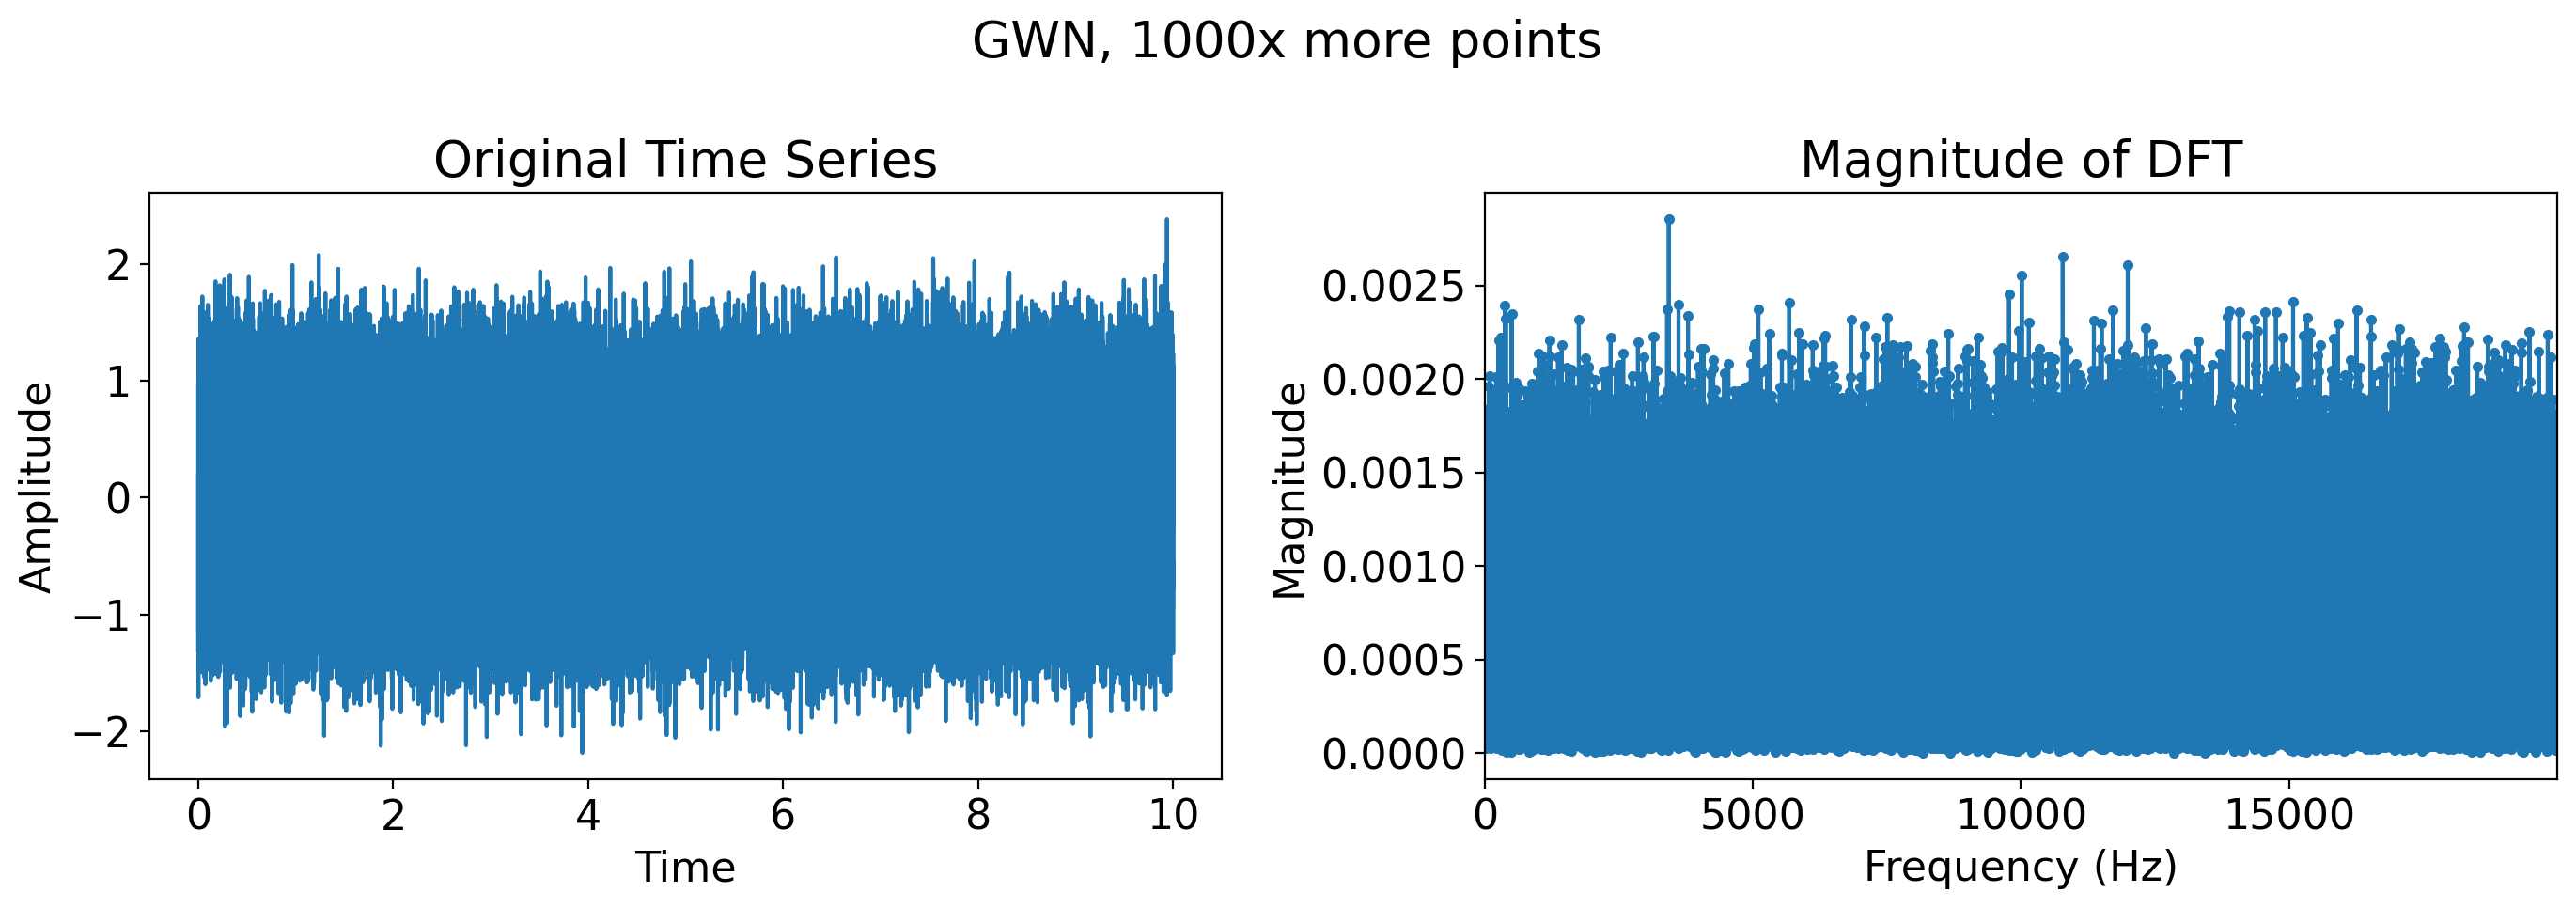

In [21]:
# Just Gaussian white noise, many more timesteps
more_t = t = np.linspace(0, 10, 400 * 1000, endpoint=False)
more_gaussian_white_noise = np.random.normal(0, 0.5, len(more_t))
plot_time_series_and_dft(t, more_gaussian_white_noise, title="GWN, 1000x more points")

### Inverting the Fourier Transform

Recall that the Fourier Transform generates the original timeseries *exactly*.

As such, once we have all the Fourier coefficients $A_j$ and $B_j$, we can **invert** them to get back the original timeseries *exactly*.

The next slides show this.  First, with a single sine wave:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Create a sample time series (e.g., a sine wave)
t = np.linspace(0, 1, 400, endpoint=False)
original_timeseries = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

# Compute the Fourier Transform (FFT)
fft_result = fft(original_timeseries)

# Reconstruct the original time series using the Inverse Fourier Transform (iFFT)
reconstructed_timeseries = ifft(fft_result)

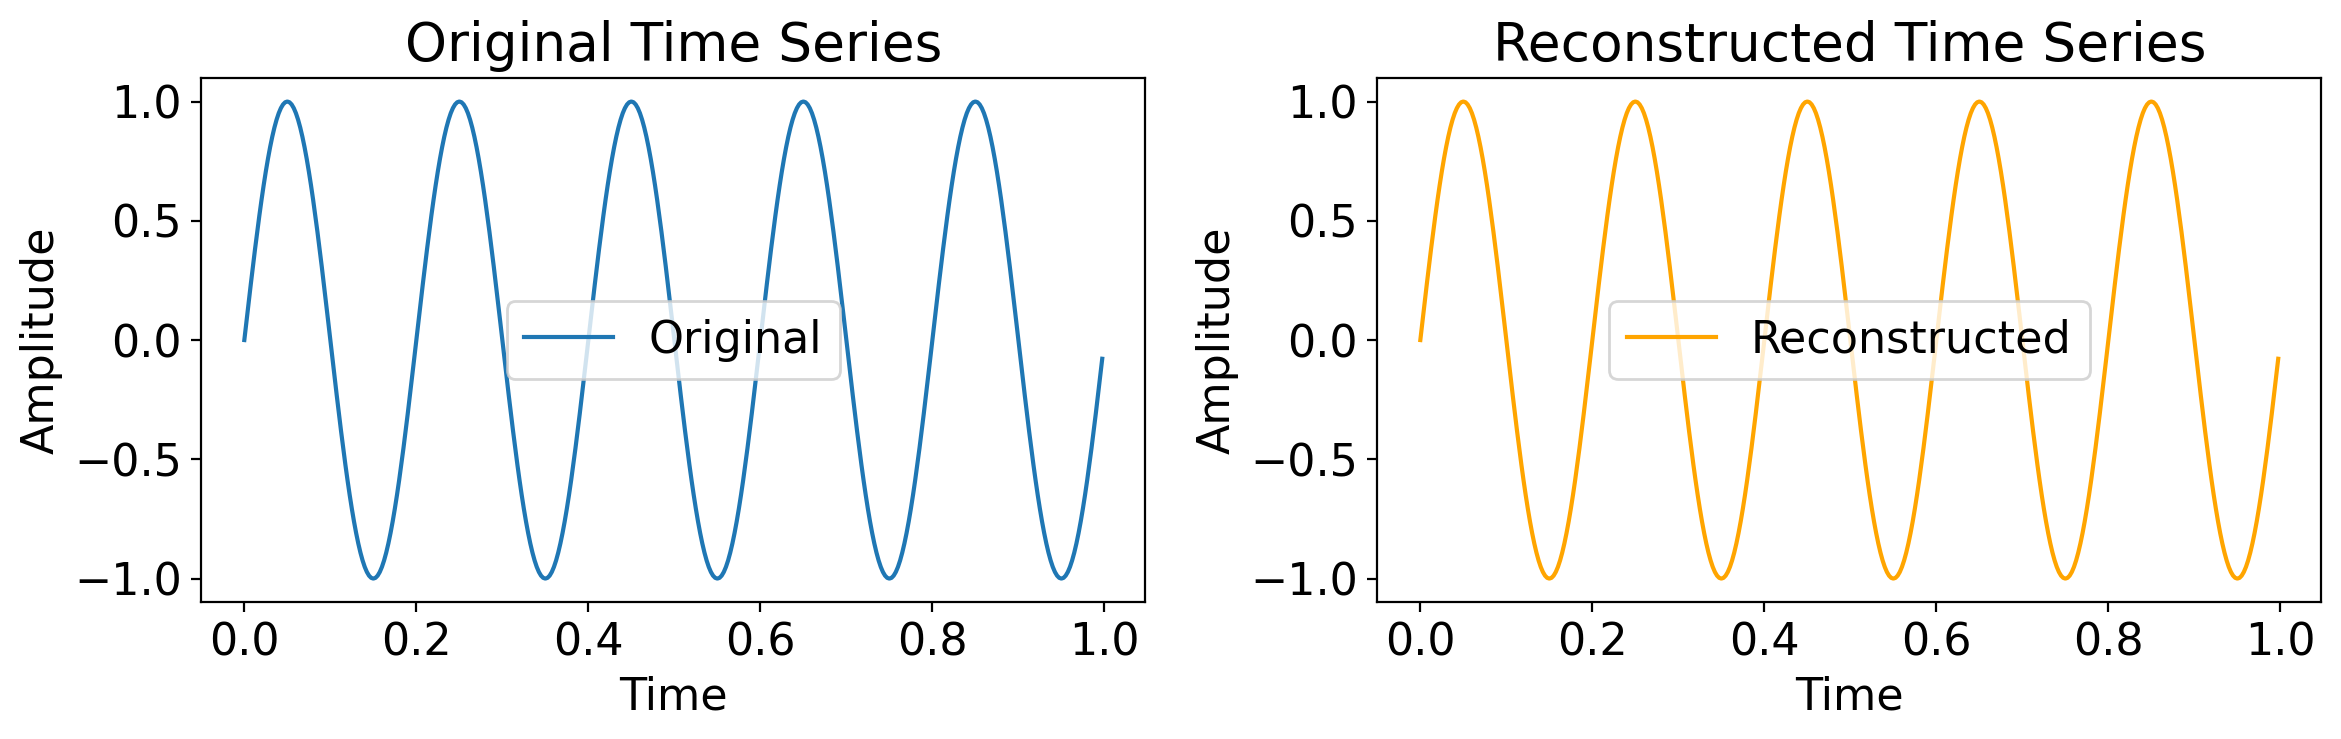

In [23]:
# Plotting
plt.figure(figsize=(12, 4))

# Plot the original time series
plt.subplot(1, 2, 1)
plt.plot(t, original_timeseries, label="Original")
plt.title("Original Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot the reconstructed time series
plt.subplot(1, 2, 2)
plt.plot(
    t, reconstructed_timeseries.real, label="Reconstructed", color="orange"
)  # Use .real to avoid imaginary part (should be negligible)
plt.title("Reconstructed Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

Sure, but maybe that's trivial, a single sine wave.

Let's do something much more involved: the daily precip timeseries from the Central Park dataset:

In [24]:
t = np.arange(len(ds_cp_day["time"]))
original_timeseries = ds_cp_day["precip"].values

# Compute the Fourier Transform (FFT)
fft_result = fft(original_timeseries)

# Reconstruct the original time series using the Inverse Fourier Transform (iFFT)
reconstructed_timeseries = ifft(fft_result)

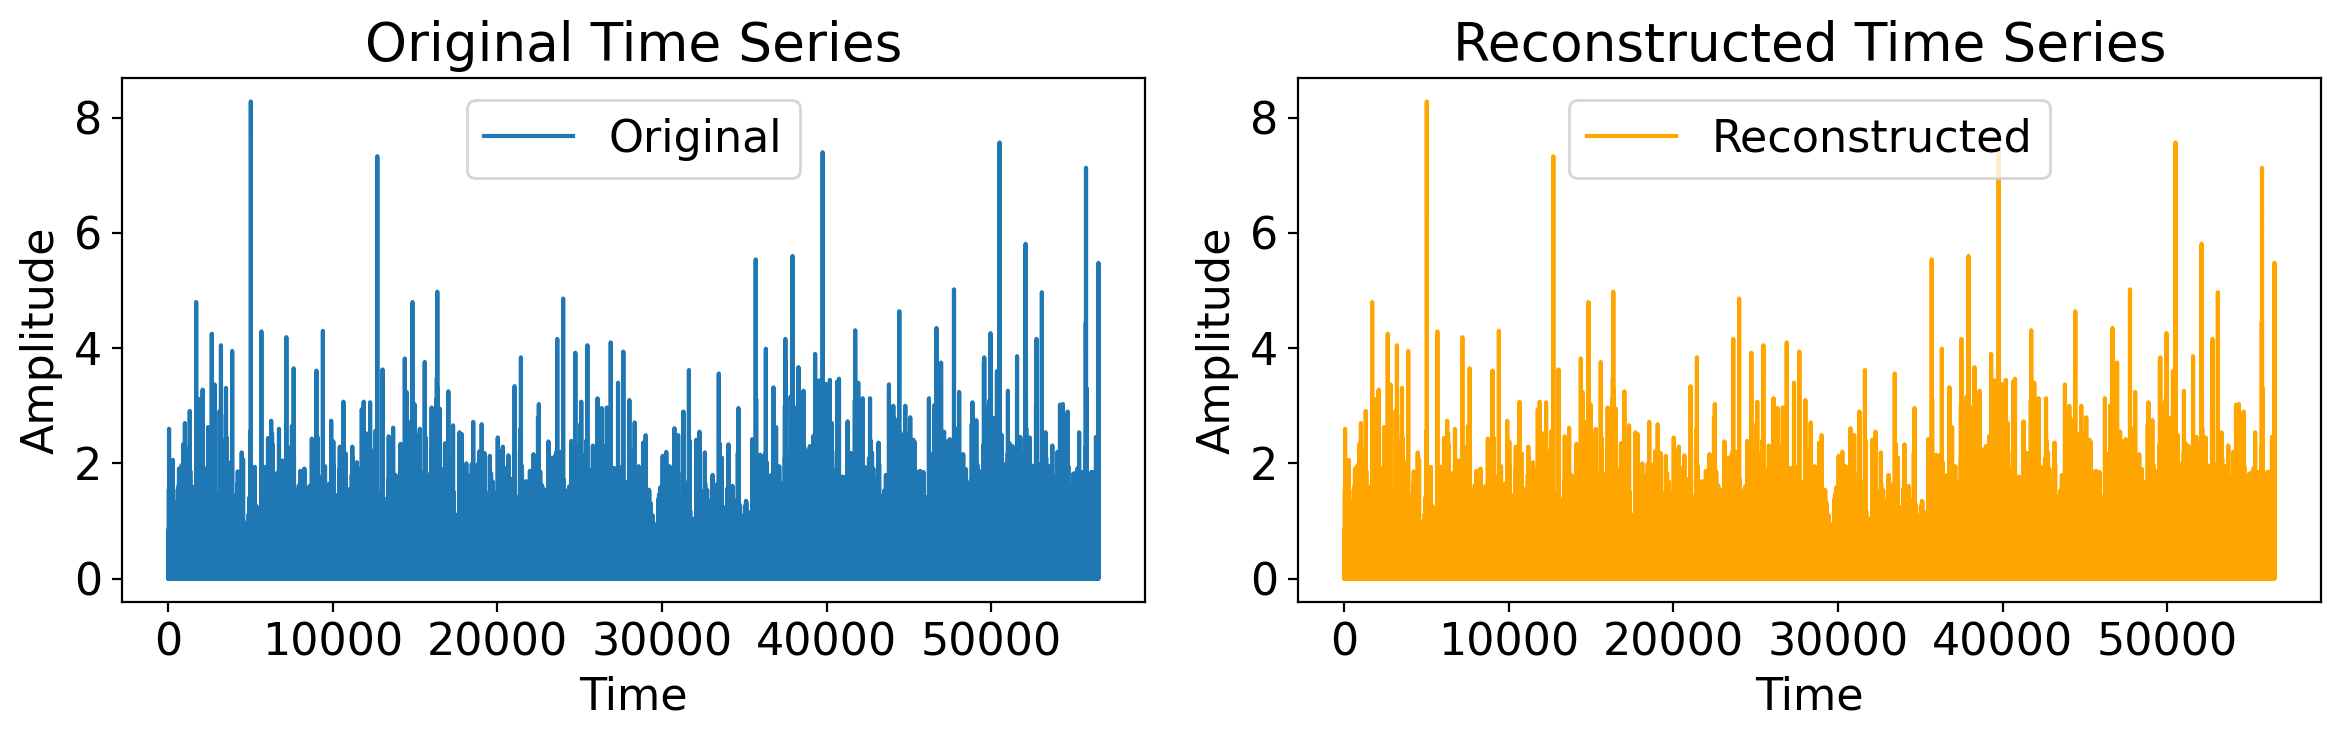

In [25]:
# Plotting
plt.figure(figsize=(12, 4))

# Plot the original time series
plt.subplot(1, 2, 1)
plt.plot(t, original_timeseries, label="Original")
plt.title("Original Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot the reconstructed time series
plt.subplot(1, 2, 2)
plt.plot(
    t, reconstructed_timeseries.real, label="Reconstructed", color="orange"
)  # Use .real to avoid imaginary part (should be negligible)
plt.title("Reconstructed Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

### Relationship between Fourier coefficients and the sample variance (**Parseval's Identity**)

How does the variance at different frequencies (i.e. the amplitudes $A_j$ and $B_j$) relate to the plain-old sample variance in time, $\hat\sigma_X^2$?

Again, skipping over the derivation entirely, it turns out there's a very nice relationship between them, known as **Parseval's Identity**:

$$\left(\frac{N-1}{N}\right)\hat\sigma^2_X=\frac{1}{2}\sum_{j=1}^{\frac{N}{2}-1}\left(A_j^2+B_j^2\right) + A^2_{N/2}.$$

In words: the sample variance is the sum of the squared amplitudes at each individual frequency.

The leading factor $(N-1)/N$ of course gets closer to $1$ as $N$ increases, and it comes from the $N-1$ rather than $N$ in the denominator of the *sample* variance.

Let's verify this for the Central Park daily rainfall:

In [26]:
cp_precip_sample_var = float(ds_cp_day["precip"].var(ddof=1).values)
print(cp_precip_sample_var)

0.12510580708459001


In [27]:
# Perform the FFT to get all the Fourier coefficients
fft_cp_precip = scipy.fft.fft(ds_cp_day["precip"].values)

For an apples-to-apples comparison, we have to do two extra things due to the slightly different way that FFT solves for the coefficients as noted above:

1. Divide each FFT value by the sample size (since the FFT algorithm doesn't).
2. Drop the first FFT coefficient, a step that stems from how it handles the time mean of the array.

But with these pre-processing steps we arrive at our desired result:

In [28]:
sample_size = len(ds_cp_day["precip"])

# Sum the square of all the Fourier coefficients.
cp_precip_fft_mag_sum = (np.abs(fft_cp_precip[1:] / sample_size) ** 2).sum()
normed_fft_sum = sample_size / (sample_size - 1) * cp_precip_fft_mag_sum

print(
    f"""
Directly computed sample variance: {cp_precip_sample_var}.
Sum of square of Fourier coefficient magnitudes: {normed_fft_sum}.
Difference: {(100 - 100 * cp_precip_sample_var / normed_fft_sum):0.1f}%
"""
)


Directly computed sample variance: 0.12510580708459001.
Sum of square of Fourier coefficient magnitudes: 0.12510580708459001.
Difference: 0.0%



## Periodograms

### Overview

The Fourier transform decomposes the timeseries into the sum of contributions of sines and cosines at each of the *Fourier frequencies*.

The **periodogram** essentially fills in the gaps between that discrete number of Fourier frequencies.

And the **power spectrum** is essentially the same thing as the periodogram but applied to a *population* rather than a particular *sample*.

### Definition

The periodogram, $\hat{p}(\omega)$, is defined as:

$$\hat{p}(\omega)=\sum_{\tau=-(N-1)}^{N-1}\hat{c}(\tau)\cos(\omega\tau),$$

where $\tau$ is lag, $\omega$ is *any* (angular) frequency, and $\hat{c}(\tau)$ is the sample autocovariance function.

In words, this is the sum over all possible lags of the autocovariance at that lag times the cosine of the product of that lag with the specified frequency.

The term *angular freqency* means that one complete cycle equals $2\pi$ radians, as in the case for trigonometric functions like $\cos$.  The non-angular frequency (or just plain "frequency") is just this divided by that $2\pi$ factor.

The units of the periodogram values themselves are the same as those of the autocovariance.

I.e. the square of the units of the variable itself.

(Quite often, however, we're less interested in the absolute magnitudes of the periodogram than the relative magnitudes across different frequencies, making the units and raw individual values less important.)

(In fact, the periodogram and Fourier decomposition results are unique only up to a leading constant, such that in different places you'll see different leading factors.)

### Interpretation

Conceptually, you could think of this as the sum over all lags of the autocovariance, but weighted at each lag by the $\cos(\omega\tau)$ term.

So if, across lags, there is an oscillation in the sample autocovariance $\hat{c}(\tau)$ at a given frequency $\omega$, then the product $\hat{c}(\tau)\cos(\omega\tau)$ will have large magnitude when summed across all lags.

For example, suppose the sample autocovariance is a decaying oscillation: $\hat{c}(\tau)\approx ae^{-b\tau}\cos(\pi\tau)$, where $a$ and $b$ are some constants.

Then the periodogram at that frequency would become $\sum_\tau ae^{-b\tau}\cos^2(\pi\tau)$, which because $\cos^2$ is never negative will always sum to a positive number.

### Rewriting in a more useful form

First, recall that the autocovariance is an *even function* of lag: $\hat{c}(-\tau)=\hat{c}(\tau)$.

As such, we can replace the sum over all lags, $\sum_{T=-(N-1)}^{N-1}$, with the value at lag zero plus twice the value at each positive lag: $\hat c(0)+2\sum_{T=1}^{N-1}$.

Second, recall that the sample autocovariance at zero lag is nearly the sample variance---it just has $N$ rather than $N-1$ as the denominator.

That is, if $\hat\sigma$ is the sample variance, then $\hat c(0)=\frac{N-1}{N}\hat\sigma$.

Third, from trigonometry, we know two things:

1. $\cos(x)=-\cos(x+\pi)$
2. $\cos$ is periodic with period $2\pi$: $\cos(x)=\cos(x+2\pi k)$ for any $k$.

Let's use `numpy` to quickly re-convince ourselves of these:

In [29]:
print(
    np.all(
        [
            np.isclose(np.cos(x), -np.cos(x + np.pi))
            for x in np.linspace(0, 2 * np.pi, 1000)
        ]
    )
)
print(
    np.all(
        [
            np.isclose(np.cos(x), np.cos(x + 2 * np.pi))
            for x in np.linspace(0, 2 * np.pi, 1000)
        ]
    )
)

True
True


That means that we only need to compute the periodogram for frequencies from 0 to $\pi$: $0<\omega\leq\pi$.

All together, these mean we can rewrite the periodgram as follows:

$$\hat{p}(\omega)=\frac{N-1}{N}\hat\sigma+2\sum_{\tau=1}^{N-1}\hat{c}(\tau)\cos(\omega\tau)$$

for any $\omega$ in $0<\omega\leq\pi$.

In words, for any given frequency $\omega$, the periodgram equals the sample variance plus twice the sum of the autocovariance across all nonzero lags of the product of the autocovariance at that lag with the cosine of the frequency times that lag.

### In Python

Let's implement the periodogram in python and apply it to temperature anomalies in the Central Park dataset.

First, we'll plot the timeseries itself:

Text(0, 0.5, 'temp. anom. [F]')

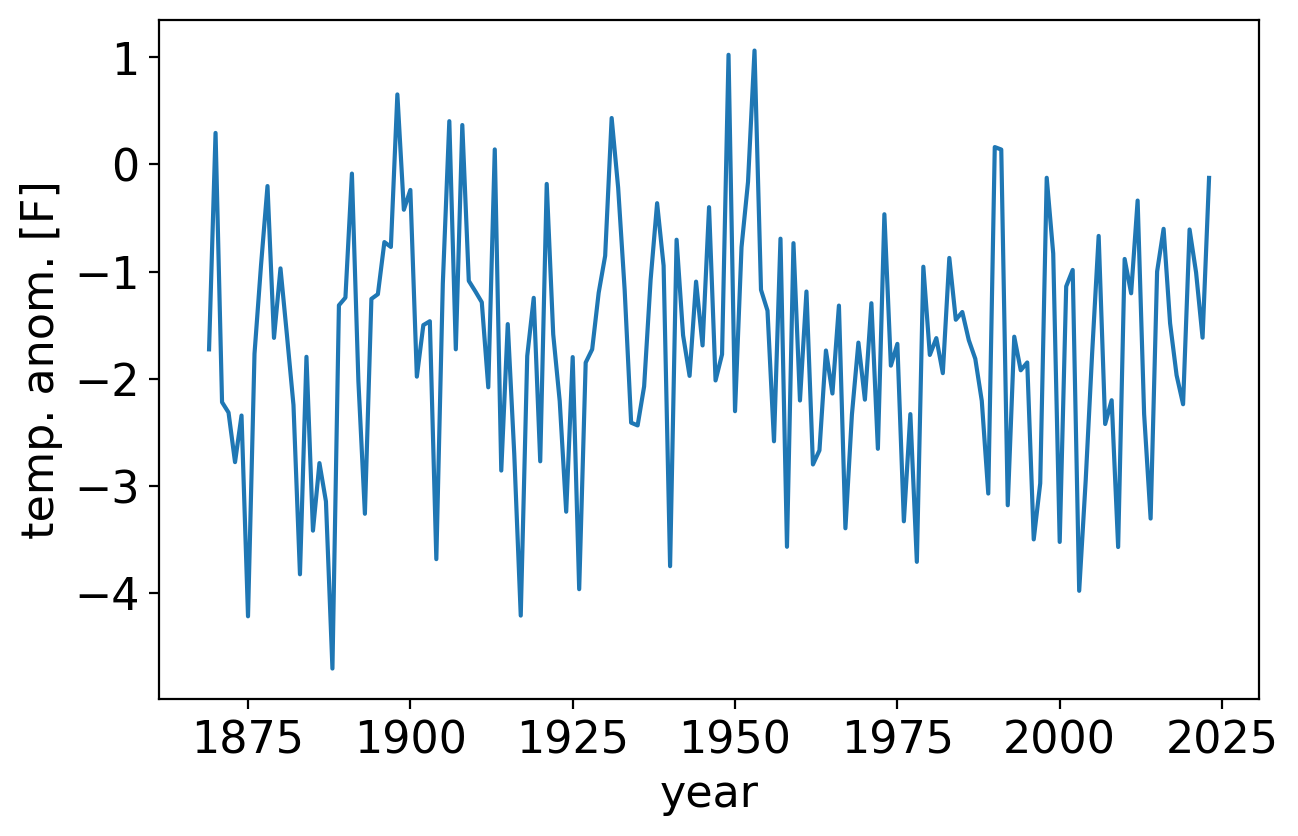

In [30]:
fig, ax = pplt.faceted_ax(width=6)
tanom_dt_ann.plot(ax=ax)
ax.set_xlabel("year")
ax.set_ylabel("temp. anom. [F]")

Next, we'll code up the periodogram from scratch and compare it to scipy's `scipy.stats.periodogram` to verify it's correct.

Our code:

In [31]:
def periodogram_raw(arr, freq=None):
    """Compute the periodogram of a given 1-D array."""
    # Process the inputted frequencies.
    if freq is None:
        freq = np.linspace(0, 0.5, 100)
    if np.ndim(freq) == 1:
        freq = freq[np.newaxis, :]
    ang_freq = 2.0 * np.pi * freq

    # Compute the autocovariance and corresponding periodogram.
    acov = autocov(arr)
    pgram = acov[0] + 2 * np.sum(
        acov[1:, np.newaxis] * np.cos(ang_freq * np.arange(1, len(arr))[:, np.newaxis]),
        axis=0,
    )
    return ang_freq[0] / (2.0 * np.pi), pgram

Now, we'll verify the results are correct vs. scipy:

In [32]:
freqs, pgram_scipy = scipy.signal.periodogram(tanom_dt_ann)

In [33]:
_, pgram_ours = periodogram_raw(tanom_dt_ann, freqs)

In [34]:
# Scipy's normalization convention is twice that of ours, hence we double our values for comparison.
print(np.allclose(pgram_scipy, 2.0 * pgram_ours))

True


For larger arrays (such as the *daily* temperature anomalies we'll see soon), our very simple algorithm is way too slow, whereas `scipy`'s is highly optimized for speed.  

So moving forward we'll just use `scipy`, creating a simple function that divides it by two to be consistent with our notation as described above.

And we'll have it return an `xarray.DataArray` rather than `numpy.ndarray`, since `xarray` objects provide more metadata and functionality:

In [35]:
def xperiodogram(*args, **kwargs):
    """Wrapper around scipy.signal.periodogram."""
    freqs, pgrams = scipy.signal.periodogram(*args, **kwargs)
    return xr.DataArray(
        0.5 * pgrams,
        dims=["frequency"],
        coords={"frequency": freqs},
        name="periodogram",
    )

The frequencies that `scipy.signal.periodogram` outputs range from 0 to 0.5, with units of *cycles per timestep*.  (Why they stop at 0.5, the **Nyquist frequency**, is discussed further below.)

In [36]:
print(freqs[0], freqs[-1])

0.0 0.4967741935483871


In this case, for a timeseries of consecutive annual temperature anomalies, the timestep is one year, so the units of frequency are *cycles per year*.

So the highest value, which we'll round up to 0.5, corresponds to one half cycle per year, or equivalently a period of 2 years.

OK, let's plot it, with frequency as the x axis and the periodgram value at that frequency the y axis.  (We'll overlay on the top axis the period corresponding to the given frequency):

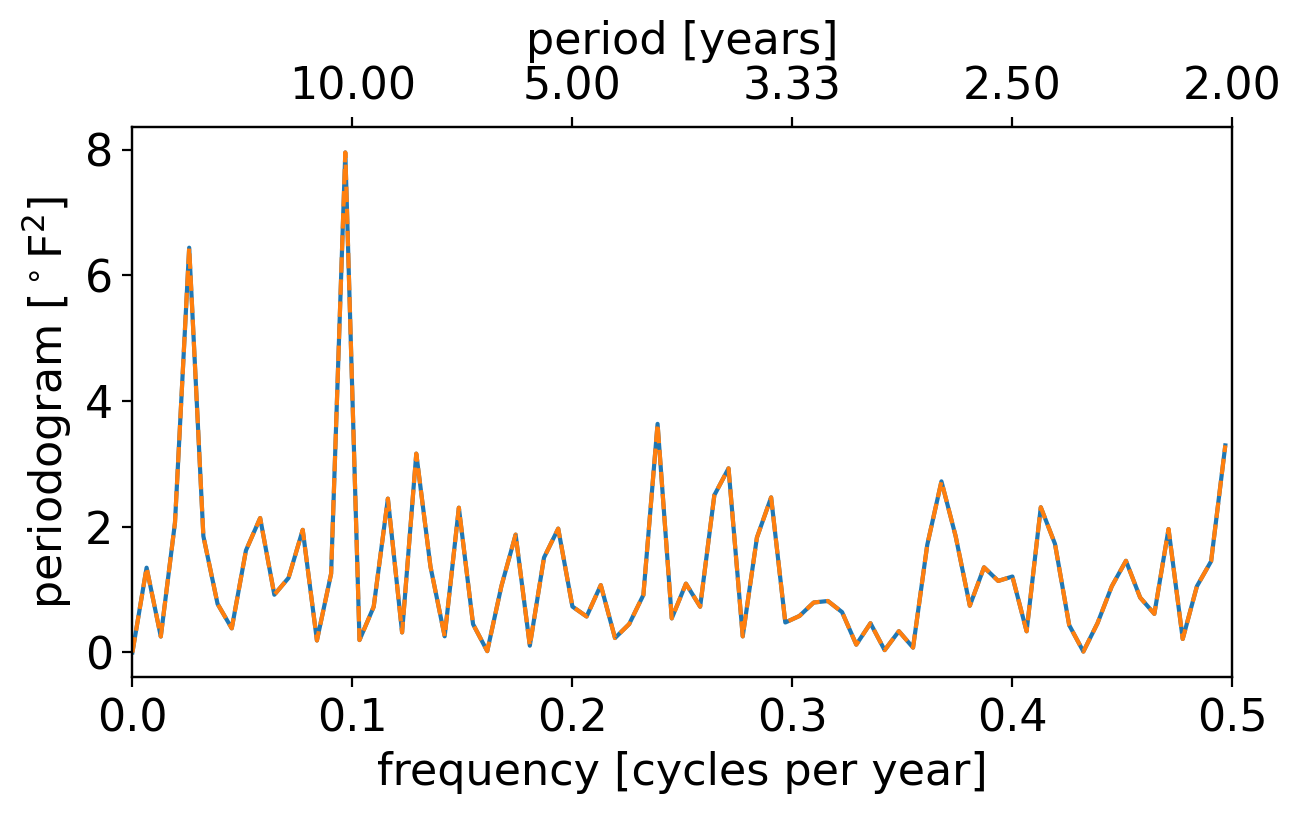

In [37]:
fig, ax = pplt.faceted_ax(width=6, aspect=0.5)
ax.plot(freqs, 0.5 * pgram_scipy, label="scipy")
ax.plot(freqs, pgram_ours, label="ours", linestyle="--")

ax.set_xlim(0, 0.5)
ax.set_xlabel("frequency [cycles per year]")
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")

# Overlay periods as top axis.
ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks()[1:])
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels(["{:.2f}".format(1 / x) for x in ax.get_xticks()[1:]])
_ = ax2.set_xlabel("period [years]")

Our result and the scipy result are indeed identical, so that's good.  What else do you see?

The largest peak occurs just below 0.1 cycles per year.  Admittedly, it's not obvious to your professor what physical process would give rise to a roughly decadal oscillation like this in the annual temperature anomalies.

The next largest peak is at an even lower frequency.  

However, with frequency plotted in a linear scale like this, the low-frequency / long-timescale behaviors all get smushed together on the far left, making it hard to discern things precisely.

And conversely, the faster timescale behaviors take up most of the plotted domain: notice that nearly a third of the axis is taken up by periods between roughly 2 and 3.

One way to avoid this would be to *invert* the horizontal axis spacing, so that it's linear in period rather than frequency:

(0.0, 17.0)

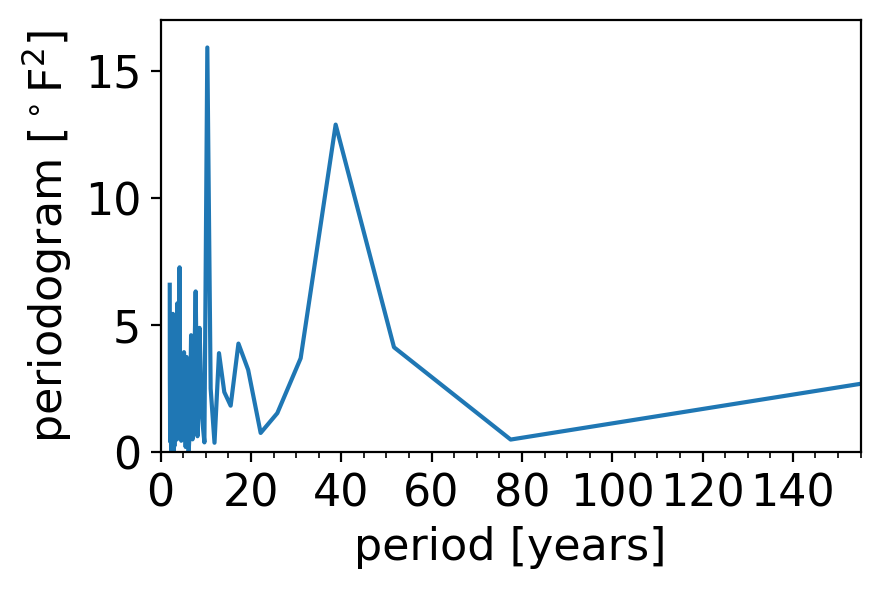

In [38]:
fig, ax = pplt.faceted_ax()
# Drop the first element, which is 0 frequency, to avoid divide-by-zero.
ax.plot(1 / freqs[1:], pgram_scipy[1:])
ax.set_xlim(0, 155)
ax.set_xticks(np.arange(0, 141, 20))
ax.set_xticks(np.arange(5, 156, 5), minor=True)

ax.set_xlabel("period [years]")
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")
ax.set_ylim(0, 17)

Now we see clearly that the secondary peak has a period of around 40 years.

But now we have the opposite problem: the short frequency behavior is really squished, and the long-timescale behavior is way stretched out.

A nice compromise is to plot either the frequency or period with *logarithmic spacing*.  In the next plot, the left panel shows this using frequency, and the right panel shows this using period:

(0.0, 17.0)

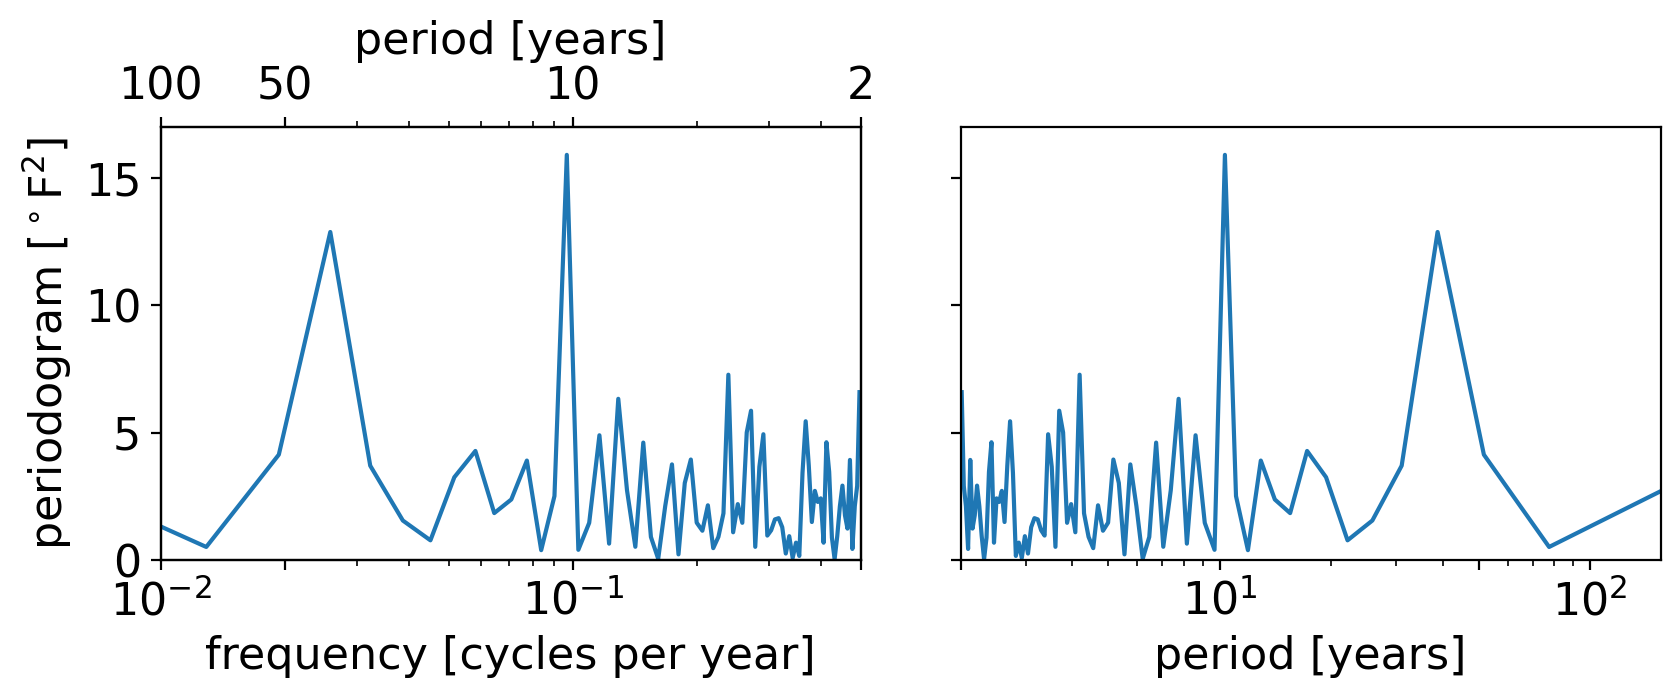

In [39]:
fig, axarr = pplt.faceted(1, 2, width=8, sharex=False, internal_pad=0.5)

# Left panel: log(frequency)
axf = axarr[0]
axf.semilogx(freqs, pgram_scipy)
axf.set_xlim(1e-2, 0.5)
axf.set_xticks(1.0 / np.array([2, 10, 50, 100]))
axf.set_xlabel("frequency [cycles per year]")
axf.set_ylabel(r"periodogram [$^\circ$F$^2$]")

axf2 = axf.twiny()
axf2.set_xscale("log")
axf2.set_xticks(axf.get_xticks())
axf2.set_xbound(axf.get_xbound())
axf2.set_xticklabels(["{:.0f}".format(1 / x) for x in axf.get_xticks()])
axf2.set_xlabel("period [years]")

# Right panel: log(period)
axp = axarr[1]
axp.semilogx(1 / freqs[1:], pgram_scipy[1:])
axp.set_xticks(np.array([2, 10, 50, 100]))
axp.set_xlabel("period [years]")
axp.set_xlim(2, 155)
axp.set_ylim(0, 17)

The two plots are identical, just mirrored in the horizontal.  (To convince yourself of this, try re-running the cell above with the `xlim` of either panel reversed.  For example: try `axp.set_xlim(155, 2)`)

And they strike a nice compromise, with neither the low nor high frequencies too smushed.

So we'll stick with the log spacing moving forward.

Let's now look at the periodogram of the *monthly* rather than *annual* anomalies.  First, the timeseries itself:

Text(0, 0.5, 'temp. anom. [F]')

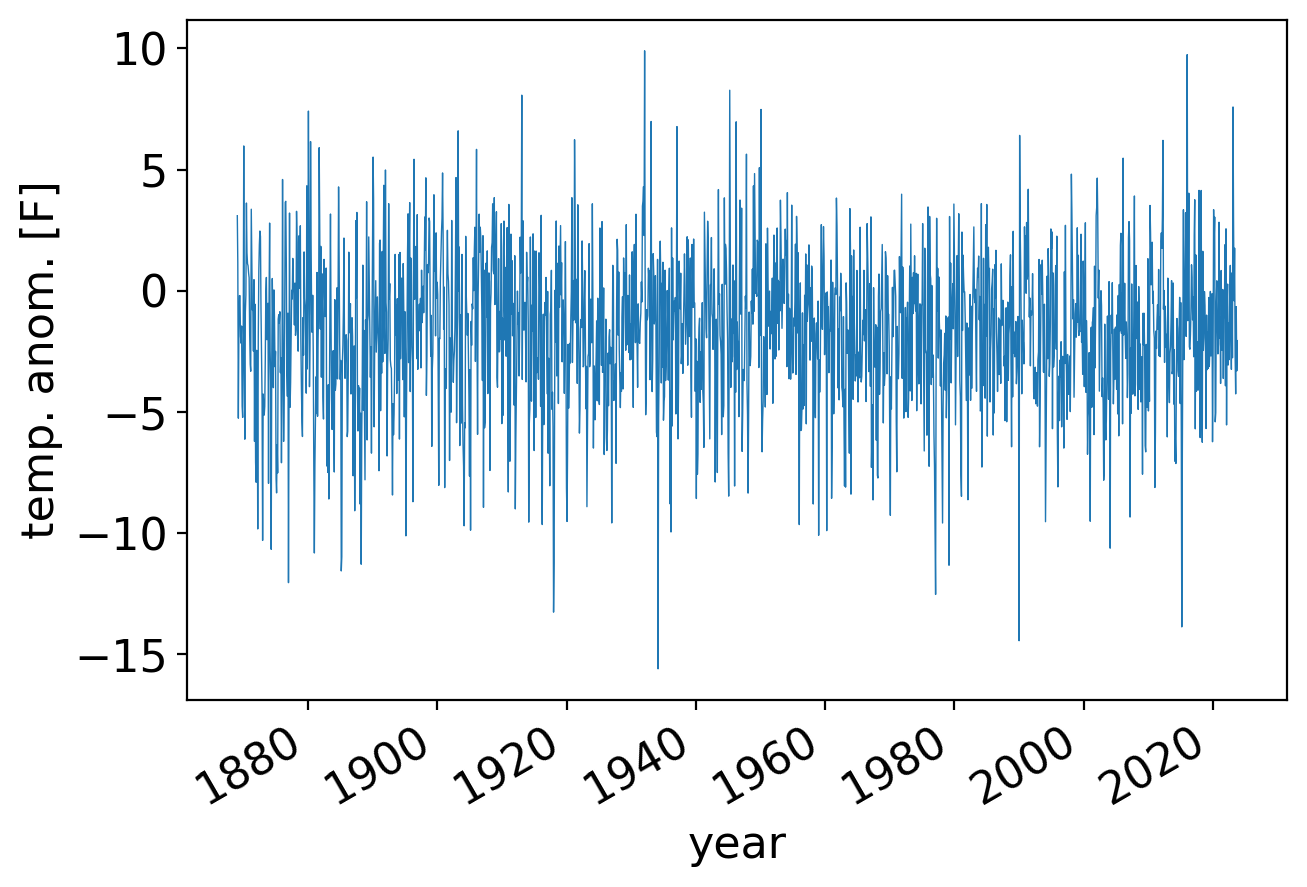

In [40]:
fig, ax = pplt.faceted_ax(width=6)
tanom_dt_mon.plot(ax=ax, linewidth=0.5)
ax.set_xlabel("year")
ax.set_ylabel("temp. anom. [F]")

Now, the corresponding periodogram:

In [41]:
pgram_mon = xperiodogram(tanom_dt_mon)

Text(0.5, 0, 'period [months]')

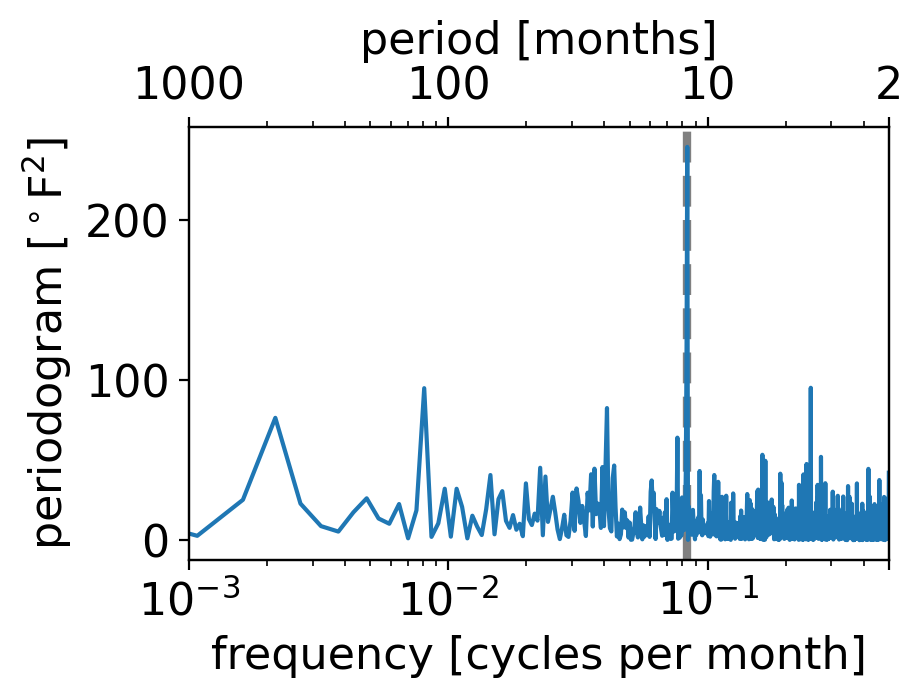

In [42]:
fig, ax = pplt.faceted_ax()
pplt.mark_x0(ax, x0=1 / 12.0, linewidth=3, linestyle="--")
pgram_mon.plot(ax=ax, xscale="log")
ax.set_xlim(1e-3, 0.5)
ax.set_xticks(1.0 / np.array([2, 10, 100, 1000]))
ax.set_xlabel("frequency [cycles per month]")
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")

ax2 = ax.twiny()
ax2.set_xscale("log")
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels(["{:.0f}".format(1 / x) for x in ax.get_xticks()])
ax2.set_xlabel("period [months]")

What do you see?

By far the strongest peak is right at one cycle per twelve months, i.e. once per year.

(The dashed grey vertical line shows that exact once-yearly frequency.)

But these are temperature *anomalies* from the seasonally varying long-term average.  Shouldn't there be no seasonal cycle in that case?

The answer lies in the fact that the magnitude of temperature fluctuations is itself seasonal: in New York City (as much of the extratropics), daily and monthly weather fluctuations are larger than they are in summer.

We can see this by plotting the standard deviation of the daily and monthly temperature anomalies, for each calendar month separately:

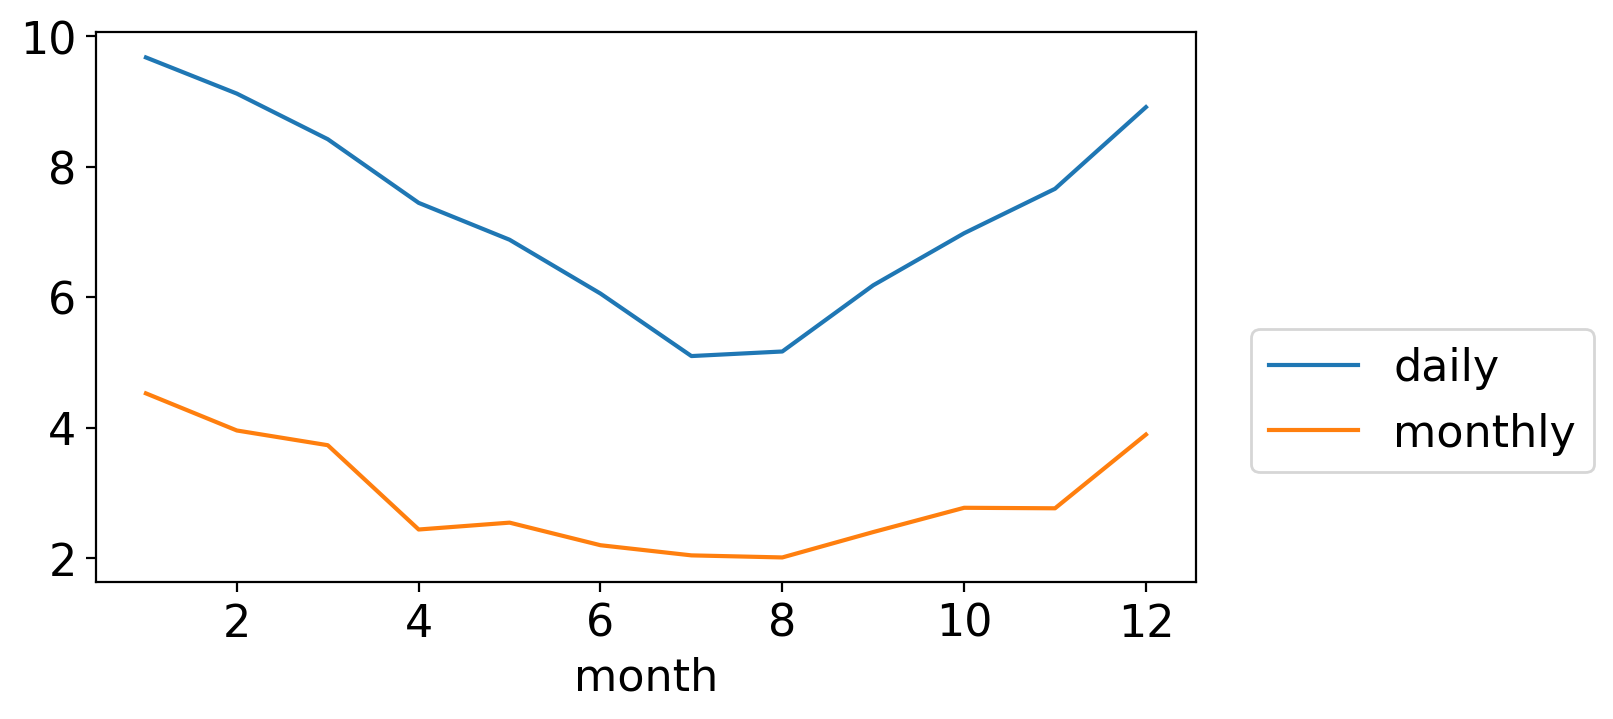

In [43]:
fig, ax = pplt.faceted_ax(width=6, aspect=0.5)
tanom_dt_day.groupby("time.month").std().plot(ax=ax, label="daily")
tanom_mon_stdev_mon = tanom_dt_mon.groupby("time.month").std()
tanom_mon_stdev_mon.plot(ax=ax, label="monthly")
ax.legend(loc=(1.05, 0.2))

Both are largest in winter and smallest in summer.  (And, not surprisingly, daily fluctuations are generally larger in magnitude than the monthly averages of those daily wiggles.)

To confirm this intuition, we can generate a normalized monthly anomaly timeseries, where each value is divided by the standard devaition for that calendar month:

The result is a dimensionless timeseries with identical variance across all calendar months:

In [44]:
tanom_dt_mon_std_normed = tanom_dt_mon / tanom_mon_stdev_mon.sel(
    month=tanom_dt_mon.time.dt.month
)

If we plot its periodogram, we see all the same signals as the full case **except** the 12-month one has gone way down (even if it hasn't gone away entirely):

In [45]:
pgram_mon_norm = xperiodogram(tanom_dt_mon_std_normed)

Text(0.5, 0, 'period [months]')

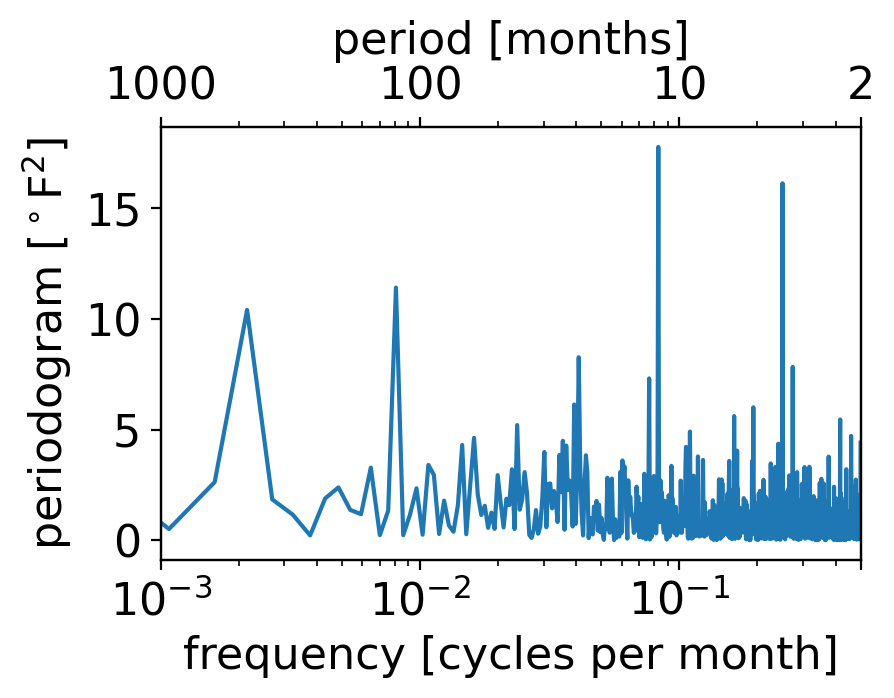

In [46]:
fig, ax = pplt.faceted_ax()
pgram_mon_norm.plot(ax=ax, xscale="log")
ax.set_xlim(1e-3, 0.5)
ax.set_xticks(1.0 / np.array([2, 10, 100, 1000]))
ax.set_xlabel("frequency [cycles per month]")
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")

ax2 = ax.twiny()
ax2.set_xscale("log")
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels(["{:.0f}".format(1 / x) for x in ax.get_xticks()])
ax2.set_xlabel("period [months]")

We can see this especially clearly by comparing to the version where the normalization is by the annual rather than monthly-varying standard deviation:

In [47]:
pgram_mon_ann_norm = xperiodogram(tanom_dt_mon / tanom_dt_mon.std())

Then a scatterplot of the two periodogram values reveals that they mostly fall close to the one-to-one line, except the one massive outlier corresponding to this once-yearly cycle:

Text(0, 0.5, 'normed by stdev.\nby cal. month')

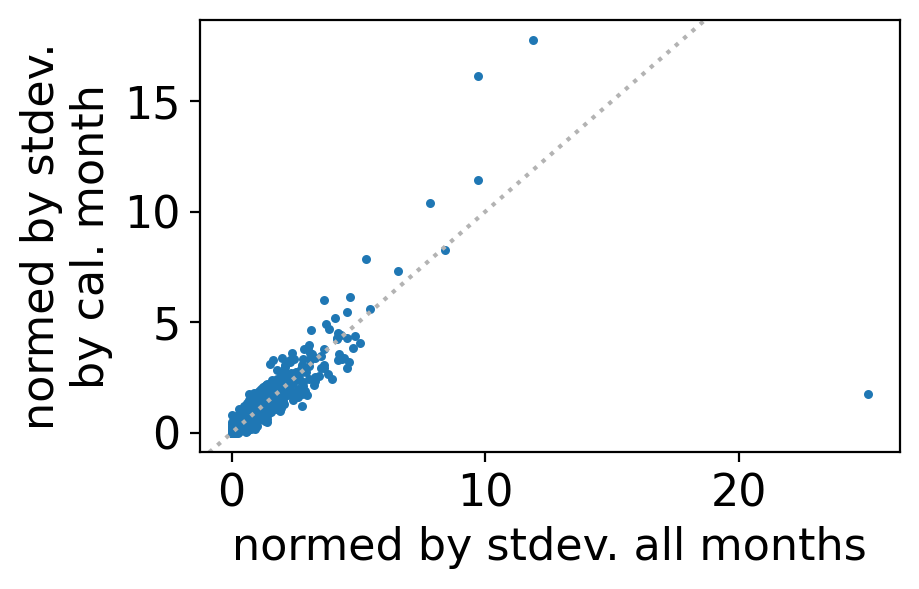

In [48]:
fig, ax = pplt.faceted_ax()
ax.scatter(pgram_mon_ann_norm, pgram_mon_norm, s=5)
pplt.mark_one2one(ax)
ax.set_xlabel("normed by stdev. all months")
ax.set_ylabel("normed by stdev.\nby cal. month")

Now, let's look at the daily anomalies, which recall look like this: 

Text(0, 0.5, 'T anom [F]')

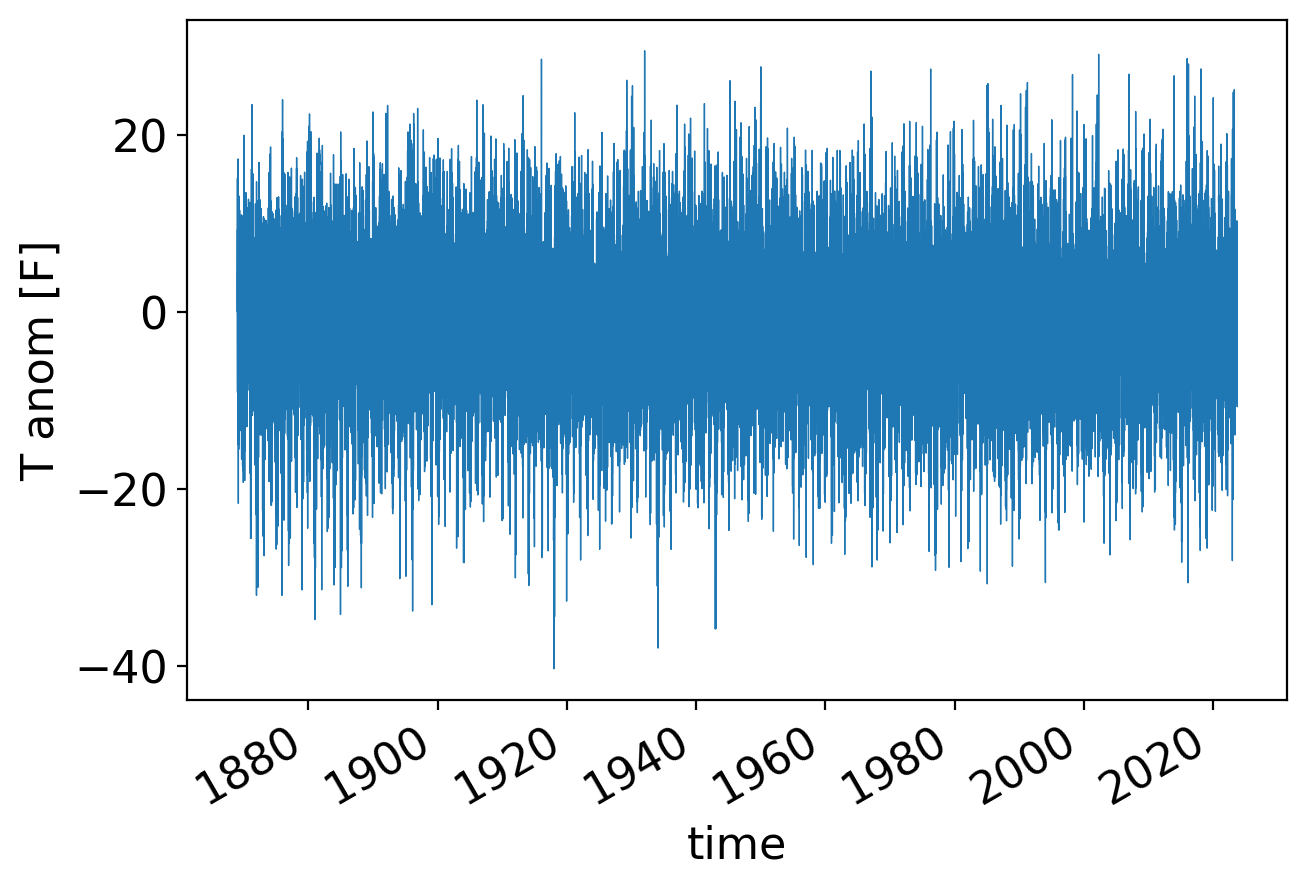

In [49]:
fig, ax = pplt.faceted_ax(width=6)
tanom_dt_day.plot(linewidth=0.5)
plt.ylabel("T anom [F]")

In its periodogram, the once per year signal shows up even more prominently than for the monthly averages:

Text(0, 0.5, 'periodogram [$^\\circ$F$^2$]')

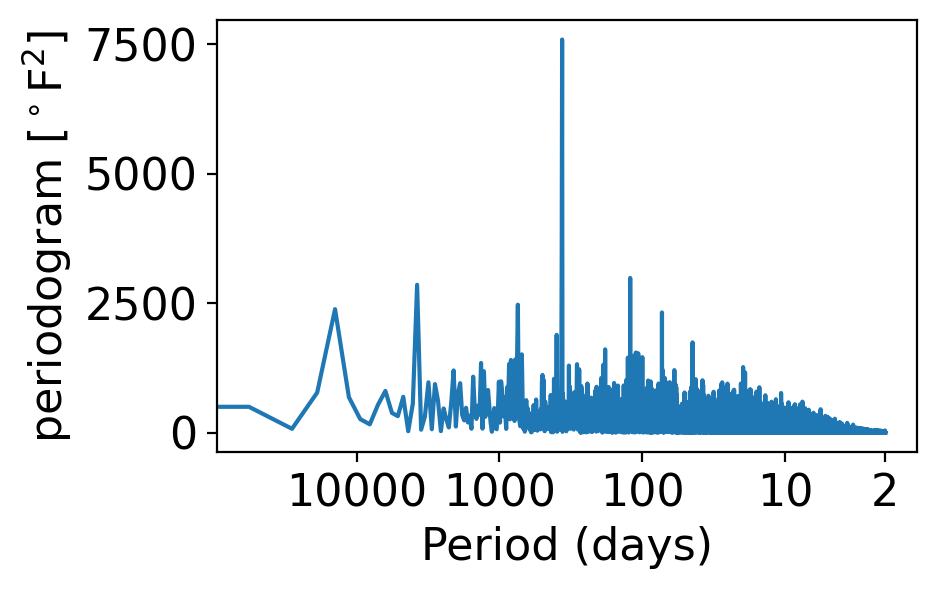

In [50]:
pgram_daily = xperiodogram(tanom_dt_day)

fig, ax = pplt.faceted_ax()
pgram_daily.plot(ax=ax, xscale="log")

periods = np.array([2, 10, 100, 1000, 10000])
ax.set_xlabel("Period (days)")
ax.set_xticks(1 / periods)
ax.set_xticklabels(periods)
ax.set_xticks([], minor=True)
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")

The reason is the same as for the monthly case: daily temperature variance is greater in winter than in summer:

Text(0, 0.5, 'T stdev. [F]')

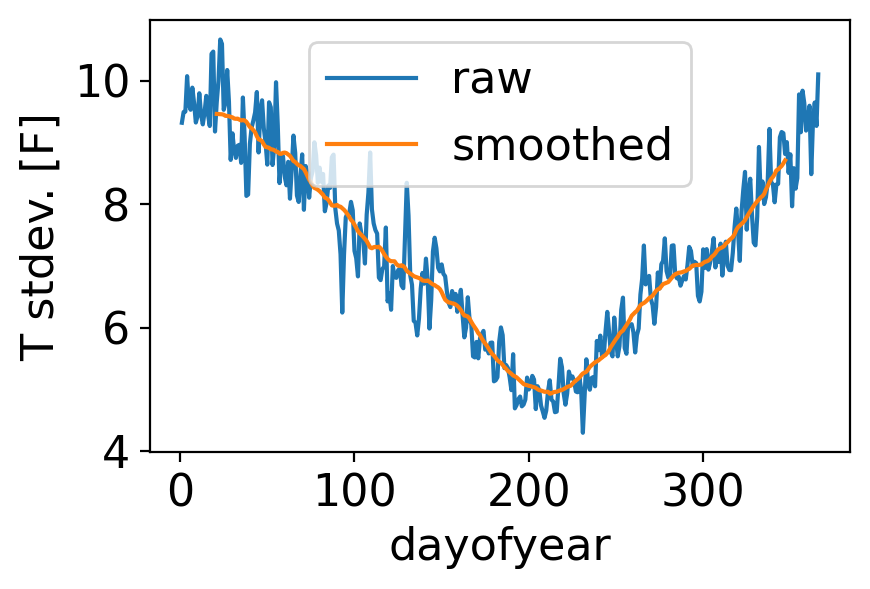

In [51]:
fig, ax = pplt.faceted_ax()
tanom_dt_day.groupby("time.dayofyear").std().plot(label="raw")
tanom_dt_day.groupby("time.dayofyear").std().rolling(
    dayofyear=40, center=True
).mean().plot(label="smoothed")
ax.legend()
ax.set_ylabel("T stdev. [F]")

Let's repeat but for the *full* temperature field---not the departures from normal---which of course has a very strong annual cycle:

Text(0, 0.5, 'daily avg T [F]')

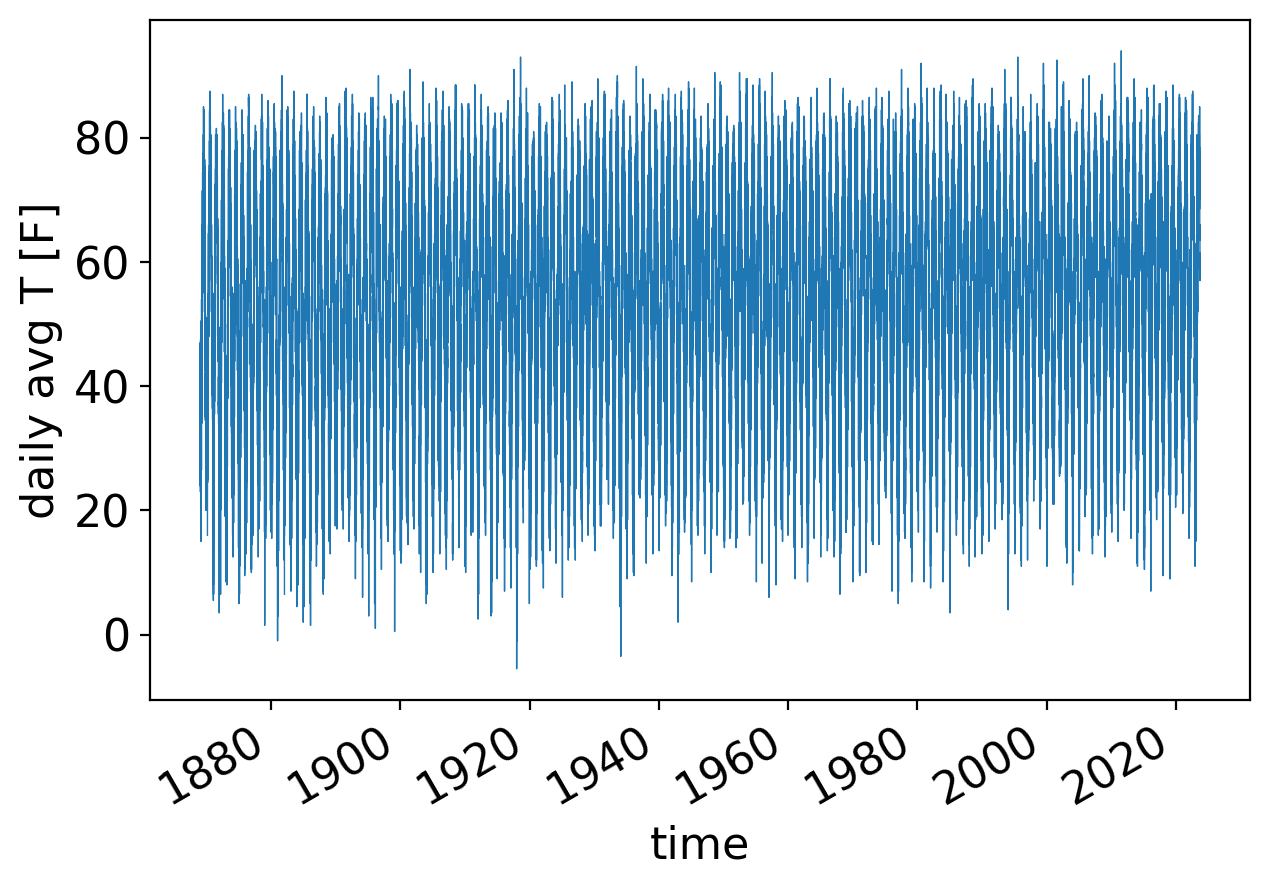

In [52]:
fig, ax = pplt.faceted_ax(width=6)
temp_avg_filled = ds_cp_day["temp_avg"].plot(linewidth=0.5)
ax.set_ylabel("daily avg T [F]")

Now we have to do some data cleaning.

Recall that there are some missing values early in the record that we dropped. These `NaN` values will cause `scipy.signal.periodogram` to break, returning just all `NaN`s:

In [53]:
_, pgrams_with_nans = scipy.signal.periodogram(ds_cp_day["temp_avg"])
np.all(np.isnan(pgrams_with_nans))

True

These bad values all occur before the year 1960.  So for simplicity we'll just restrict to values after 1959:

In [54]:
temp_day_post1959 = ds_cp_day["temp_avg"].sel(time=slice("1960", None))

Finally, let's compute and plot the periodogram of this post-1959 daily temperature timeseries:

Text(0, 0.5, 'periodogram [$^\\circ$F$^2$]')

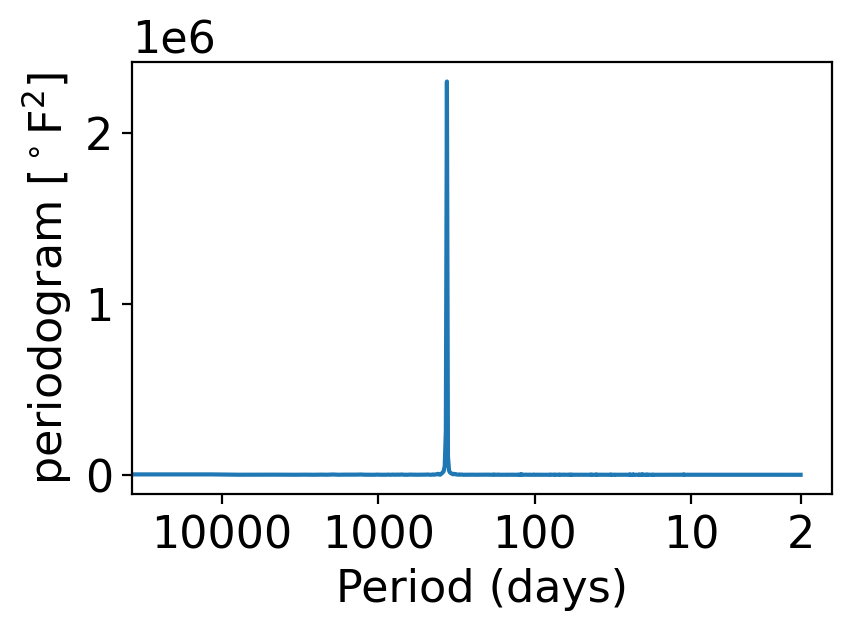

In [55]:
pgram_daily_full = xperiodogram(temp_day_post1959)

fig, ax = pplt.faceted_ax()
pgram_daily_full.plot(ax=ax, xscale="log")

periods = np.array([2, 10, 100, 1000, 10000])
ax.set_xlabel("Period (days)")
ax.set_xticks(1 / periods)
ax.set_xticklabels(periods)
ax.set_xticks([], minor=True)
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")

This looks like a [delta function](https://en.wikipedia.org/wiki/Dirac_delta_function): zero everywhere except a single, huge spike.

In fact, we won't go into the math whatsoever, but indeed if a timeseries has a regular periodic component, it is precisely the case that that frequency will show up as (the finite approximation to) a delta function in the periodogram.

If you find yourself with a periodogram that looks like this, but you want to be able to discern behaviors other than the giant spike, you have two options:

Option 1: remove the periodic component in some way (that's what the `temp_anom` variable is: `temp_avg` but with its regular seasonal cycle subtracted off).

Option 2: use log spacing for the *vertical* axis, which makes variations visible across a wider range of scales:

Text(0, 0.5, 'periodogram [$^\\circ$F$^2$]')

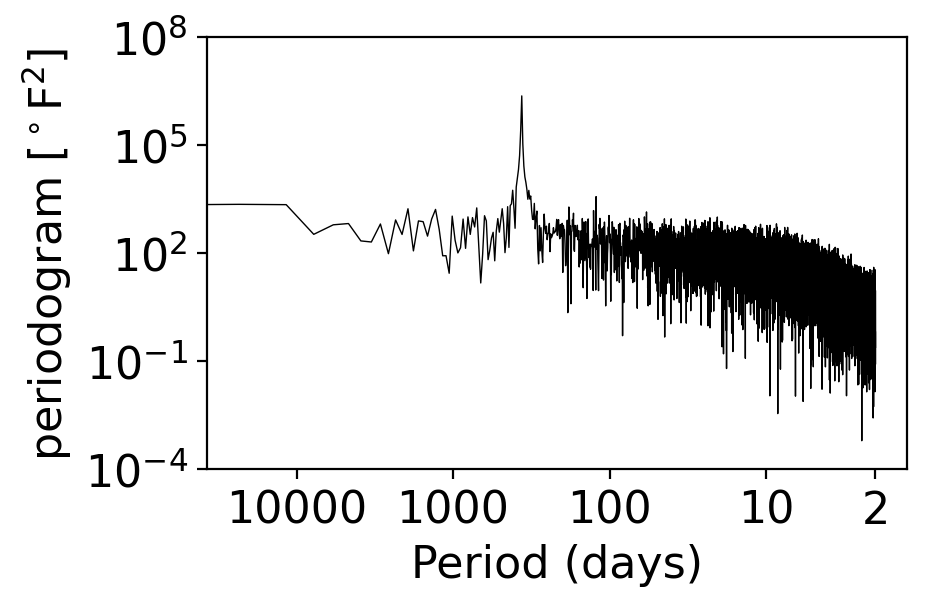

In [56]:
fig, ax = pplt.faceted_ax()
pgram_daily_full.plot(ax=ax, xscale="log", yscale="log", color="black", linewidth=0.5)

periods = np.array([2, 10, 100, 1000, 10000])
ax.set_xlabel("Period (days)")
ax.set_xticks(1 / periods)
ax.set_xticks([], minor=True)
ax.set_xticklabels(periods)
ax.set_ylim(1e-4, 1e8)
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")

What do you see?

* The y axis spans a massive 11 orders of magnitude (meaning the largest values are ${\sim}10^{11}\times$ bigger than the smallest ones)!  

* The annual peak is ~4 orders of magnitude larger than any other signal

* At high frequencies (above ~100 days), there's a gradual sloping down.  (We won't go into it, but this is the signature of a "red noise" or [Brownian noise](https://en.wikipedia.org/wiki/Brownian_noise) process, one of multiple [colors of noise](https://en.wikipedia.org/wiki/Colors_of_noise) in addition to white noise.)

## The Nyquist frequency and aliasing

Why didn't we show the frequencies larger than 0.5 in the periodgram plots above?

One cycle per year means that the signal goes up *and* back down one full time in the year.

But we only have a single value for each year.  So how could we *resolve* something that is changing within the course of the year?

The answer is: we can't!

Think about it: what's the highest possible frequency that could be meaningfully resolved in any timeseries, given that at each timestep there is one single value?

Well, one timestep could be the signal going up, and the next timestep the signal going back down, and so on.

That would be a frequency of 1 cycle per *two timesteps*.  This special frequency is called the **Nyquist frequency**.

Signals at frequencies higher than the Nyquist frequency cannot be reliably discerned.

They should therefore not be plotted or otherwise used---even though there's nothing preventing us (or `scipy`) from computing them!

The issue is that signals at frequencies higher than the Nyquist frequency are prone to **aliasing**: the inability to discern between (certain) different frequencies given finite sampling.

For example, consider this sine wave in solid, and the signals you get from sampling at the Nyquist frequency (blue stars) or a lower frequency (red squares):

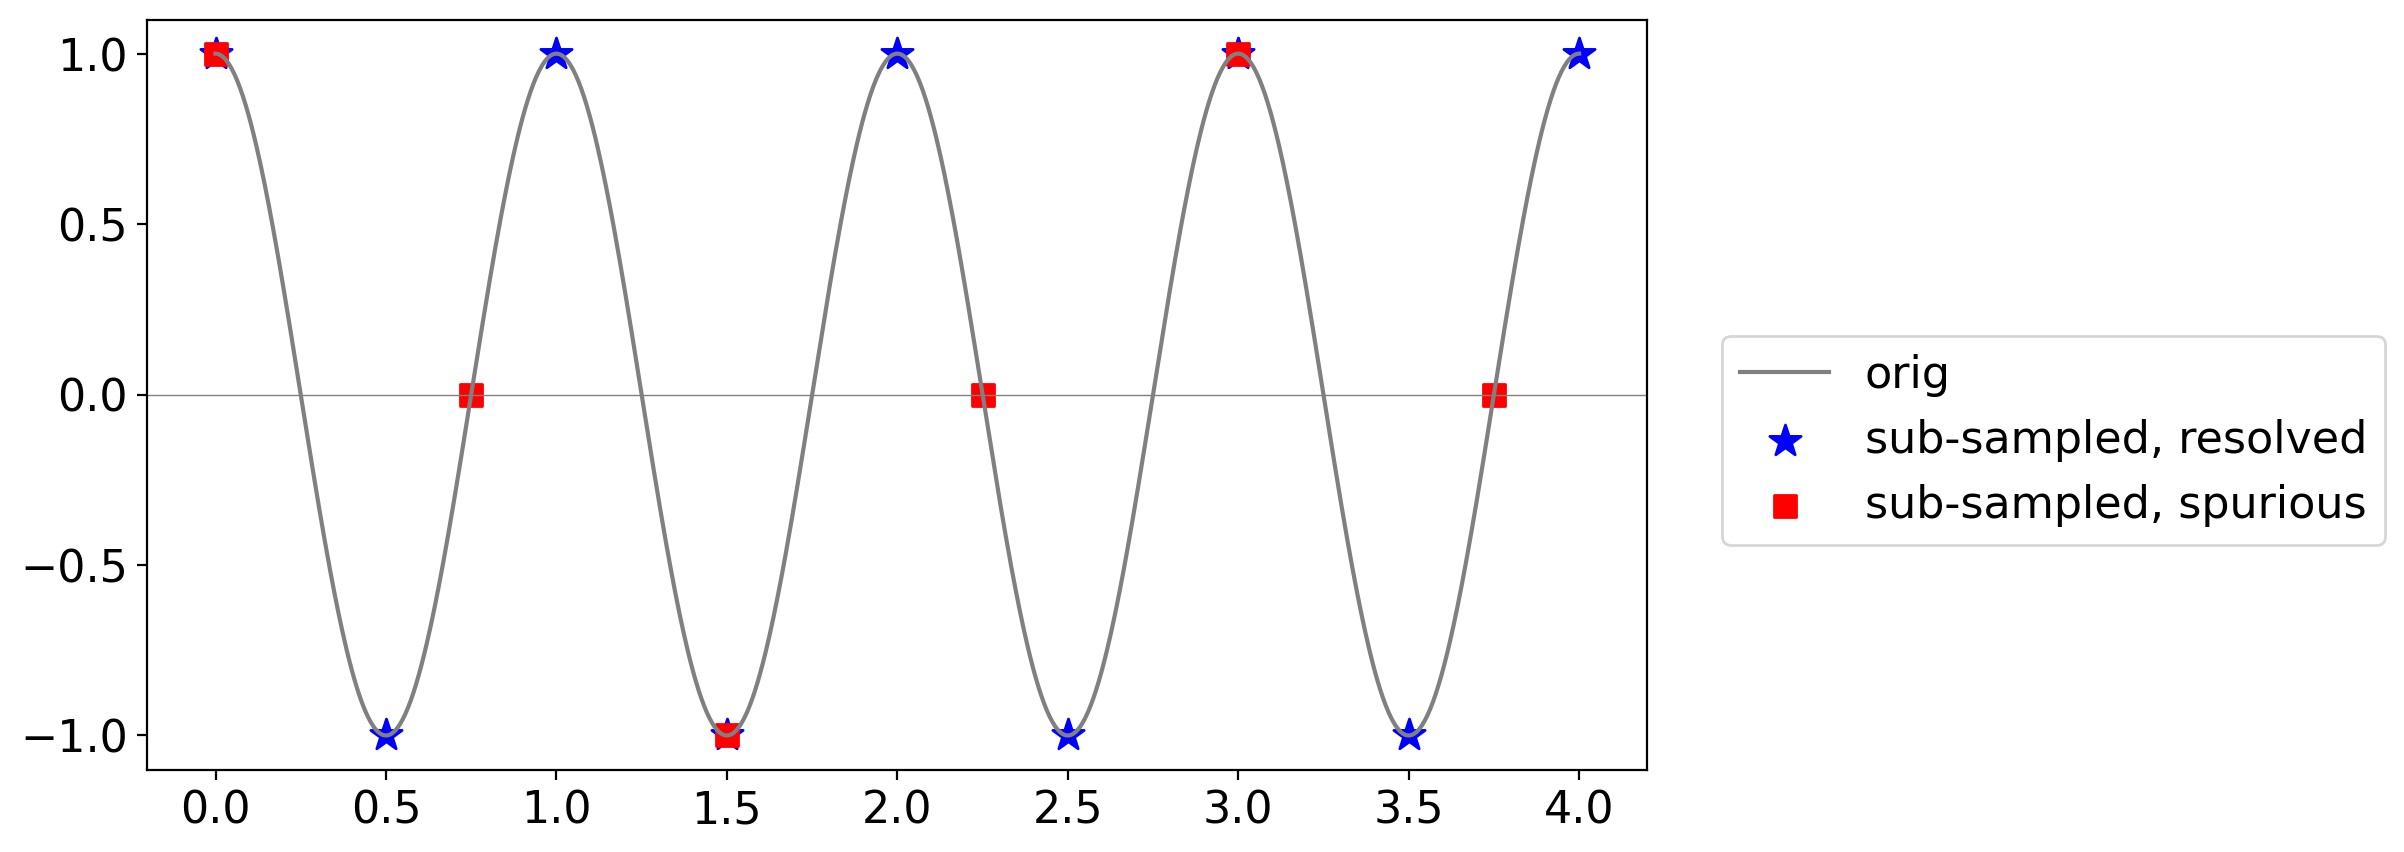

In [57]:
freq = 1.0
t = np.linspace(0, 4, 1000)
cos_true = np.cos(2.0 * np.pi * t)
t_nyq = np.arange(0, freq * 4 + 0.01, 0.5 * freq)
cos_nyq = np.cos(2.0 * np.pi * t_nyq)
t_0p75 = np.arange(0, freq * 4 + 0.01, 0.75 * freq)
cos_0p75 = np.cos(2.0 * np.pi * t_0p75)

fig, ax = pplt.faceted_ax(width=8, aspect=0.5)
pplt.mark_y0(ax)

ax.plot(t, cos_true, color="grey", label="orig")
ax.scatter(
    t_nyq, cos_nyq, marker="*", s=140, color="blue", label="sub-sampled, resolved"
)
ax.scatter(
    t_0p75, cos_0p75, marker="s", s=60, color="red", label="sub-sampled, spurious"
)
ax.legend(loc=(1.05, 0.3))

The blue stars correctly trace out the cycles of the original signal.

But the red squares give the false impression of a lower-frequency wave: this is *aliasing*.

## Power spectral density

As mentioned above, the **power spectral density** is the same thing as a periodogram, but it applies to *populations* rather than *samples*.

### Special case: white noise

It turns out that the power spectral density of a pure white process is *uniform* in frequency.

In other words, because every value is totally random and independent of all the others, there is no preferred frequency.

For *Gaussian* white noise, this constant value is equal to its variance $\sigma^2$.

Let's plot the periodogram of 1000 timesteps of a GWN process to see if this checks out:

Text(0, 0.5, 'periodogram')

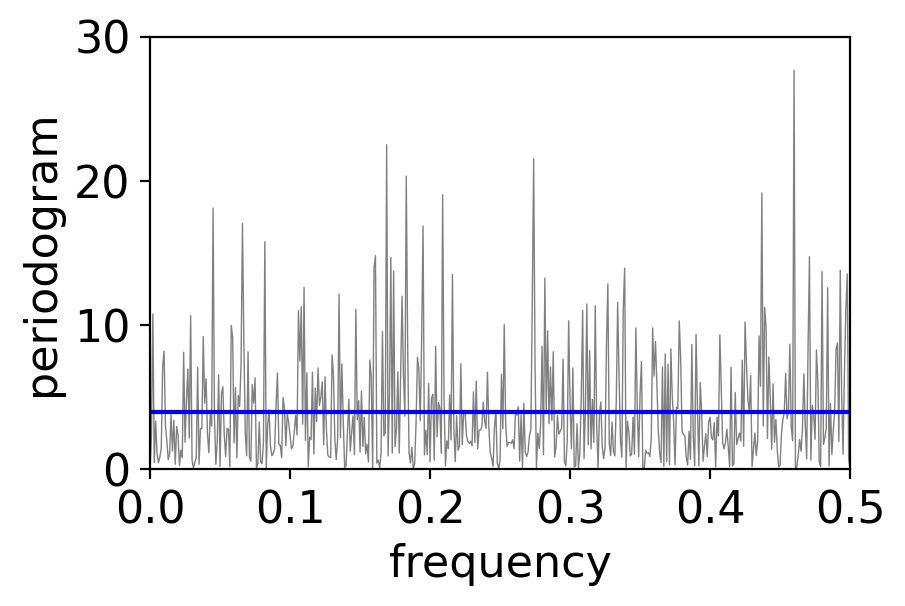

In [58]:
variance = 4
num_draws = int(1e3)
pgram_whitenoise_1e3 = xperiodogram(np.random.normal(0, np.sqrt(variance), num_draws))

fig, ax = pplt.faceted_ax()
pgram_whitenoise_1e3.plot(ax=ax, color="grey", linewidth=0.5)
ax.axhline(y=variance, color="blue")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 30)
ax.set_xlabel("frequency")
ax.set_ylabel(r"periodogram")

The periodogram values do *average* to approximately the variance as claimed:

In [59]:
pgram_whitenoise_1e3.mean()

<xarray.DataArray 'periodogram' ()>
array(4.06356852)

But there's a ton of scatter!  Usually in statistics, we beat down the noise via a larger sample size.  Let's try that:

mean across frequencies: <xarray.DataArray 'periodogram' ()>
array(3.99662877)


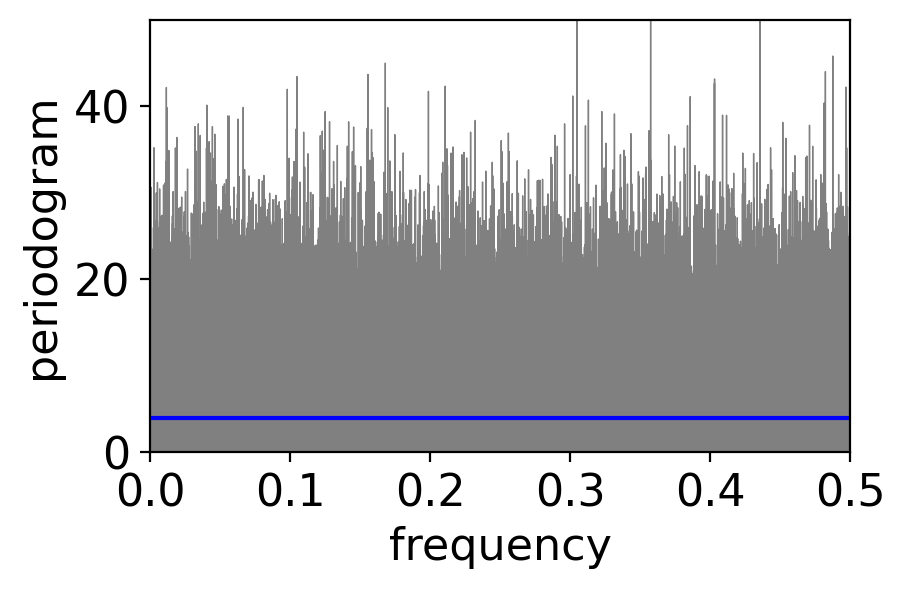

In [60]:
num_draws = int(1e6)
pgram_whitenoise_1e6 = xperiodogram(np.random.normal(0, np.sqrt(variance), num_draws))

fig, ax = pplt.faceted_ax()
pgram_whitenoise_1e6.plot(ax=ax, color="grey", linewidth=0.5)
ax.axhline(y=variance, color="blue")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 50)
ax.set_xlabel("frequency")
ax.set_ylabel(r"periodogram")
print(f"mean across frequencies: {pgram_whitenoise_1e6.mean()}")

There is no less scatter!  What's going on?

It turns out that the **variance across frequencies in a periodogram does not decrease with increasing sample size**!

It **does** decrease however if you apply a **running average** to the periodogram:

Text(0, 0.5, 'periodogram')

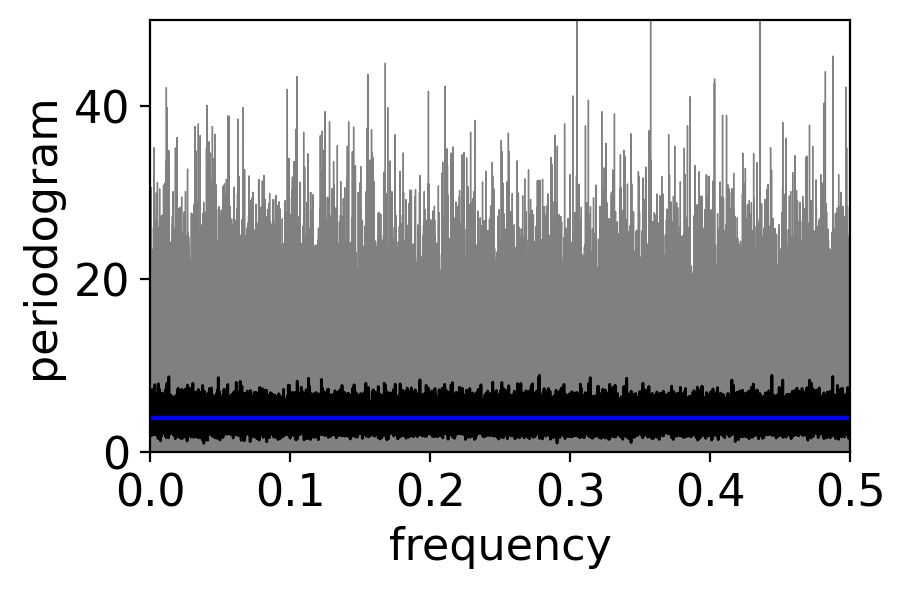

In [61]:
fig, ax = pplt.faceted_ax()
pgram_whitenoise_1e6.plot(ax=ax, color="grey", linewidth=0.5)
pgram_whitenoise_1e6.rolling(frequency=20, center=True).mean().plot(
    ax=ax, color="black", linewidth=1
)
ax.axhline(y=variance, color="blue")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 50)
ax.set_xlabel("frequency")
ax.set_ylabel(r"periodogram")

The larger the averaging window, the more the noise gets beaten down:

Text(0, 0.5, 'periodogram')

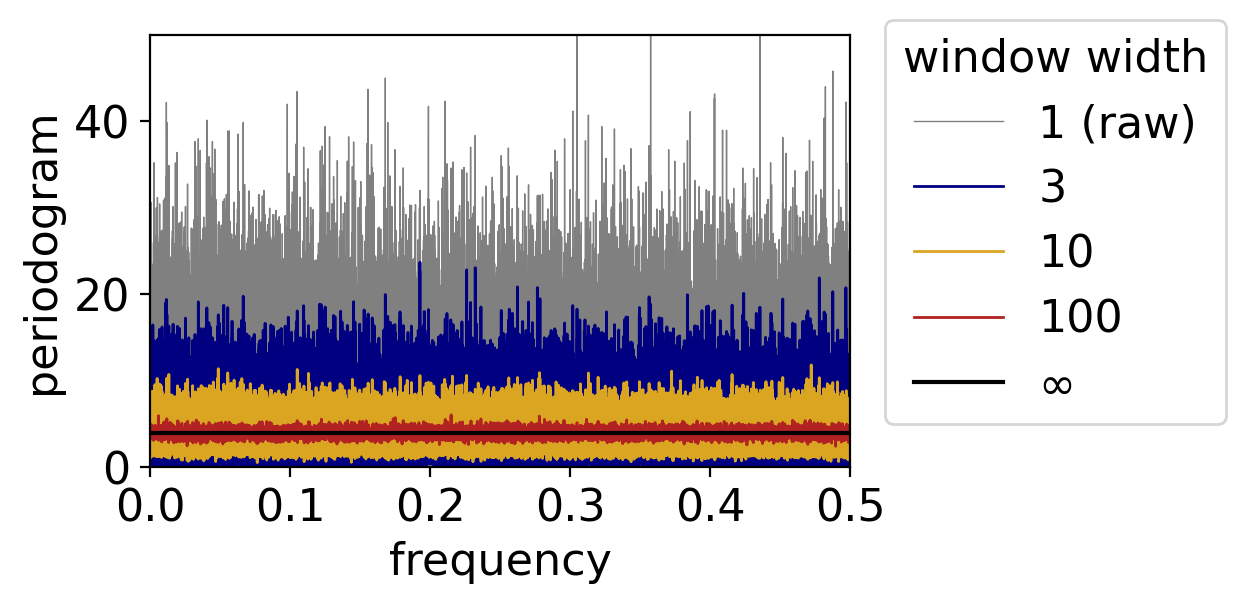

In [62]:
fig, ax = pplt.faceted_ax()
pgram_whitenoise_1e6.plot(ax=ax, color="grey", linewidth=0.5, label="1 (raw)")
for window, color in zip([3, 10, 100], ["navy", "goldenrod", "firebrick"]):
    pgram_whitenoise_1e6.rolling(frequency=window, center=True).mean().plot(
        ax=ax, color=color, linewidth=1, label=window
    )
ax.axhline(y=variance, color="black", label=r"$\infty$")
ax.legend(loc=(1.05, 0.1), title="window width")
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 50)
ax.set_xlabel("frequency")
ax.set_ylabel(r"periodogram")

### Smoothing the periodogram, beyond white noise

Except for the case of white noise, the power spectral density does vary with frequency.  (For example, the power spectral densities corresponding to the temperature anomaly periodograms we saw above.)

As such, applying a running average, like any *smoothing* process, essentially smears out some of the signal.

As such, there's a balance to strike: too narrow a window leaves too much noise, but too wide a window can inadvertently remove real signals.

We'll illustrate this by applying different averaging windows to the daily temperature anomalies:

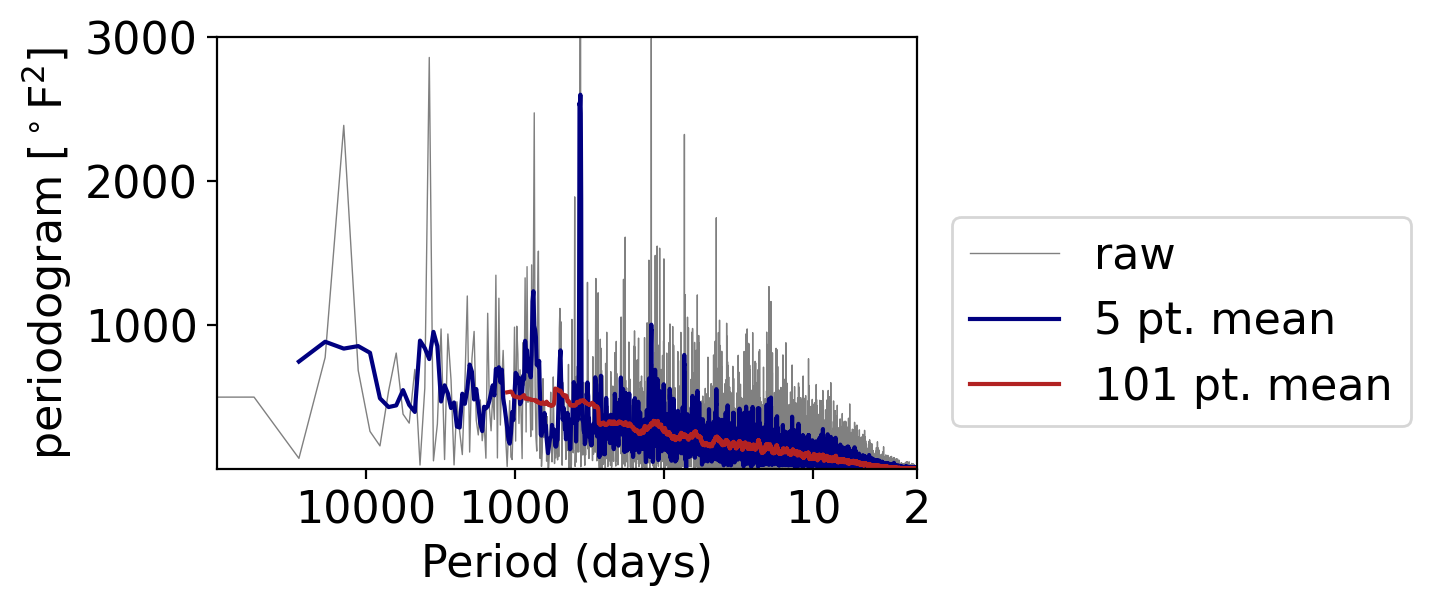

In [65]:
fig, ax = pplt.faceted_ax()
pgram_daily.plot(ax=ax, xscale="log", color="grey", linewidth=0.5, label="raw")
pgram_daily.rolling(frequency=5, center=True).mean().plot(
    ax=ax, xscale="log", color="navy", label="5 pt. mean"
)
pgram_daily.rolling(frequency=101, center=True).mean().plot(
    ax=ax, xscale="log", color="firebrick", label="101 pt. mean"
)
periods = np.array([2, 10, 100, 1000, 10000])
ax.set_xlabel("Period (days)")
ax.set_xticks(1 / periods)
ax.set_xticklabels(periods)
ax.set_xticks([], minor=True)
ax.set_xlim(1e-5, 0.5)
ax.set_ylabel(r"periodogram [$^\circ$F$^2$]")
ax.set_ylim(1e-3, 3e3)
ax.legend(loc=(1.05, 0.1))

What do you see?

With the 5-point-wide window (meaning the point plus two on either side), we retain the once-yearly peak.

But going to a 101 points (meaning the point and 50 on either side), the peak is almost indiscernible from the otherwise general decrease in power moving as frequency increases.

## Wrapping up

Spectral analysis is a powerful tool for identifying key periodicities in your data.

But getting the calculations done properly and interpreting them correctly can be challenging!

And what we've covered is really just the tip of the iceberg.